# Exploratory Data Analysis of Stock Market Data

## Imports

In [1]:
!pip install statsmodels plotly pandas tabulate seaborn

In [2]:
from plotly.offline import plot, iplot, init_notebook_mode
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from tabulate import tabulate
import seaborn as sns
import pandas as pd
import tabulate
import warnings

## Options

In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Functions

In [4]:
def split_date(df, target_col, new_alias=None):
    """
    Utility to convert a date column into various date entities like year, month, day, etc.

    Args:
        df (pd.DataFrame): Input DataFrame
        target_col (string): Feature on which the split needs to be performed. Must be of datetime type
        new_alias (string): String alias to be used for split columns generated from target_col.
                            In case no value is passed then it is same as target_col
    """
    
    if new_alias is None:
        new_alias = target_col
    
    df[f'{new_alias}_year'] = df[target_col].dt.year
    df[f'{new_alias}_month'] = df[target_col].dt.month
    df[f'{new_alias}_day'] = df[target_col].dt.day
    df[f'{new_alias}_quarter'] = df[target_col].dt.quarter
    df[f'{new_alias}_is_month_start'] = df[target_col].dt.is_month_start.astype(int)
    df[f'{new_alias}_is_month_end'] = df[target_col].dt.is_month_end.astype(int)
    
    return df

## Load Data

### Original raw data

In [5]:
raw_aapl_df = pd.read_csv('../static/datasets/original/aapl.csv', parse_dates=['Date'])
raw_aapl_df.columns = raw_aapl_df.columns.str.lower().str.replace(' ', '_')

raw_gmbl_df = pd.read_csv('../static/datasets/original/gmbl.csv', parse_dates=['Date'])
raw_gmbl_df.columns = raw_gmbl_df.columns.str.lower().str.replace(' ', '_')

raw_tsla_df = pd.read_csv('../static/datasets/original/tsla.csv', parse_dates=['Date'])
raw_tsla_df.columns = raw_tsla_df.columns.str.lower().str.replace(' ', '_')

#### Shape and Size

In [6]:
table = [
    ['Raw Stock Data','Shape','Size'],
    ['Apple', raw_aapl_df.shape, raw_aapl_df.size],
    ['Tesla', raw_tsla_df.shape, raw_tsla_df.size],
    ['Esports Entertainment Group', raw_gmbl_df.shape, raw_gmbl_df.size]
]

print(tabulate.tabulate(table, headers='firstrow', tablefmt='grid'))

+-----------------------------+------------+--------+
| Raw Stock Data              | Shape      |   Size |
+=============================+============+========+
| Apple                       | (10623, 7) |  74361 |
+-----------------------------+------------+--------+
| Tesla                       | (3170, 7)  |  22190 |
+-----------------------------+------------+--------+
| Esports Entertainment Group | (1393, 7)  |   9751 |
+-----------------------------+------------+--------+


### Preprocessed Data

In [7]:
aapl_df = pd.read_csv('../static/datasets/preprocessed_aapl.csv', parse_dates=['date'])
gmbl_df = pd.read_csv('../static/datasets/preprocessed_gmbl.csv', parse_dates=['date'])
tsla_df = pd.read_csv('../static/datasets/preprocessed_tsla.csv', parse_dates=['date'])

#### Shape and Size

In [8]:
table = [
    ['Preprocessed Stock Data','Shape','Size'],
    ['Apple', aapl_df.shape, aapl_df.size],
    ['Tesla', tsla_df.shape, tsla_df.size],
    ['Esports Entertainment Group', gmbl_df.shape, gmbl_df.size]
]

print(tabulate.tabulate(table, headers='firstrow', tablefmt='grid'))

+-----------------------------+-------------+--------+
| Preprocessed Stock Data     | Shape       |   Size |
+=============================+=============+========+
| Apple                       | (10620, 33) | 350460 |
+-----------------------------+-------------+--------+
| Tesla                       | (3167, 33)  | 104511 |
+-----------------------------+-------------+--------+
| Esports Entertainment Group | (1390, 33)  |  45870 |
+-----------------------------+-------------+--------+


### Apple Stocks

In [9]:
aapl_df.head()

,date,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns_prc,day_num,high_low_diff_mean,...,lag_2_open_close_diff,lag_3_open_close_diff,volume,lag_1_volume,lag_2_volume,lag_3_volume,adj_close,lag_1_adj_close,lag_2_adj_close,lag_3_adj_close
0,1980-12-17,1980,12,17,4,0,0,0.0,3,0.001,...,0.558,0.000,0.000,1.928640e+10,8.944320e+10,3.825920e+11,0.000,-2.171,4.777,9.988
1,1980-12-18,1980,12,18,4,0,0,0.0,4,0.001,...,0.558,0.558,-0.707,7.070000e-01,2.806000e+00,1.044300e+01,0.707,-0.707,-1.885,1.885
2,1980-12-19,1980,12,19,4,0,0,0.0,5,0.001,...,0.000,0.558,-1.087,2.050000e-01,8.810000e-01,1.885000e+00,1.098,-0.240,-0.858,-1.373
3,1980-12-22,1980,12,22,4,0,0,0.0,6,0.001,...,0.000,0.000,-0.855,-2.450000e-01,1.100000e+00,1.803000e+00,0.971,0.056,-1.027,-1.526
4,1980-12-23,1980,12,23,4,0,0,0.0,7,0.001,...,0.000,0.000,0.434,-1.144000e+00,7.100000e-01,4.793000e+00,0.984,0.032,-1.015,-2.253


### Tesla Stocks

In [10]:
tsla_df.head()

,date,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns_prc,day_num,high_low_diff_mean,...,lag_2_open_close_diff,lag_3_open_close_diff,volume,lag_1_volume,lag_2_volume,lag_3_volume,adj_close,lag_1_adj_close,lag_2_adj_close,lag_3_adj_close
0,2010-07-02,2010,7,2,3,0,0,-19.792,3,0.293,...,-122.667,-579.333,0.000,4.618500e+10,1.807095e+11,2.043975e+11,0.000,184.000,308.667,312.667
1,2010-07-06,2010,7,6,3,0,0,-24.146,4,0.285,...,-12.649,-29.620,0.707,-7.070000e-01,1.814000e+00,9.158000e+00,-0.707,0.707,1.970,2.826
2,2010-07-07,2010,7,7,3,0,0,-3.797,5,0.227,...,0.553,0.148,0.604,5.500000e-01,-1.154000e+00,1.884000e+00,-0.658,-0.493,1.151,2.619
3,2010-07-08,2010,7,8,3,0,0,7.560,6,0.173,...,1.075,1.041,1.153,-5.180000e-01,-6.340000e-01,-4.289000e+00,1.137,-0.744,-0.393,3.108
4,2010-07-09,2010,7,9,3,0,0,-1.034,7,0.110,...,0.773,4.032,-1.130,7.700000e-01,3.600000e-01,3.320000e-01,0.545,0.609,-1.154,-0.825


### Esports Entertainment Group

In [11]:
gmbl_df.head()

,date,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns_prc,day_num,high_low_diff_mean,...,lag_2_open_close_diff,lag_3_open_close_diff,volume,lag_1_volume,lag_2_volume,lag_3_volume,adj_close,lag_1_adj_close,lag_2_adj_close,lag_3_adj_close
0,2017-07-25,2017,7,25,3,0,0,-1.014,3,1.200,...,9600.003,-449.996,0.000,106000.000,726000.000,393000.000,0.000,-750.000,-9450.001,599.998
1,2017-07-26,2017,7,26,3,0,0,-0.339,4,1.800,...,-16.264,45.963,-0.707,0.707,1.569,6.608,-0.707,0.707,-6.364,-88.387
2,2017-07-27,2017,7,27,3,0,0,0.000,5,1.650,...,1.091,-14.621,-0.899,-0.178,1.077,1.841,0.577,-1.155,0.577,-8.083
3,2017-07-28,2017,7,28,3,0,0,-0.678,6,1.525,...,0.000,2.000,0.990,-1.010,0.021,1.814,-0.577,1.155,-0.577,1.155
4,2017-07-31,2017,7,31,3,0,1,-16.390,7,3.695,...,-0.620,-0.577,1.063,-0.142,-0.921,-0.520,-1.154,0.557,0.597,0.557


## Exploratory Data Analysis

### Dataframe

So basically this dataset contains 6 different features i.e. date, open, high, low, close, volume
- Date - This contains date + time at the instant of trade
- Open - Open is the price when the stock began
- High - Maximum price at the given time period
- Low - Minimum price at the given time period
- Close - Price at which stock ended
- Adj Close - Adjusted closing price
- Volume - It is the total amount of trading activity

In [12]:
raw_aapl_df.head()

,date,open,high,low,close,adj_close,volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


### Column datatypes

In [13]:
raw_aapl_df.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume                int64
dtype: object

### Info and Description

#### Apple

In [14]:
raw_aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10623 entries, 0 to 10622
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       10623 non-null  datetime64[ns]
 1   open       10623 non-null  float64       
 2   high       10623 non-null  float64       
 3   low        10623 non-null  float64       
 4   close      10623 non-null  float64       
 5   adj_close  10623 non-null  float64       
 6   volume     10623 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 581.1 KB


In [15]:
raw_aapl_df.describe()

,open,high,low,close,adj_close,volume
count,10623.000000,10623.000000,10623.000000,10623.000000,10623.000000,1.062300e+04
mean,16.692852,16.883576,16.504529,16.700995,16.031888,3.271862e+08
std,35.473142,35.905316,35.053934,35.496359,35.178076,3.377143e+08
min,0.049665,0.049665,0.049107,0.049107,0.038213,0.000000e+00
25%,0.287901,0.294643,0.281250,0.287946,0.238015,1.210850e+08
50%,0.487165,0.495536,0.479286,0.486607,0.404058,2.143456e+08
75%,16.309464,16.414108,16.111250,16.257858,14.054503,4.065544e+08
max,182.630005,182.940002,179.119995,182.009995,180.959732,7.421641e+09


#### Tesla

In [16]:
raw_tsla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3170 entries, 0 to 3169
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3170 non-null   datetime64[ns]
 1   open       3170 non-null   float64       
 2   high       3170 non-null   float64       
 3   low        3170 non-null   float64       
 4   close      3170 non-null   float64       
 5   adj_close  3170 non-null   float64       
 6   volume     3170 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 173.5 KB


In [17]:
raw_tsla_df.describe()

,open,high,low,close,adj_close,volume
count,3170.000000,3170.000000,3170.000000,3170.000000,3170.000000,3.170000e+03
mean,59.324018,60.662926,57.851085,59.283133,59.283133,9.423474e+07
std,95.546640,97.750441,93.063735,95.425467,95.425467,8.188300e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.104834,9.391666,8.915667,9.176666,9.176666,4.256085e+07
50%,16.327666,16.529000,16.063999,16.315666,16.315666,7.616385e+07
75%,25.106834,25.557832,24.667165,25.173501,25.173501,1.187124e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


#### Esports Gaming Group

In [18]:
raw_gmbl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1393 non-null   datetime64[ns]
 1   open       1393 non-null   float64       
 2   high       1393 non-null   float64       
 3   low        1393 non-null   float64       
 4   close      1393 non-null   float64       
 5   adj_close  1393 non-null   float64       
 6   volume     1393 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 76.3 KB


In [19]:
raw_gmbl_df.describe()

,open,high,low,close,adj_close,volume
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1.393000e+03
mean,8.630961,9.032708,8.107154,8.577028,8.577028,1.277801e+06
std,8.137858,8.331656,7.730892,8.020879,8.020879,1.149076e+07
min,0.072000,0.073000,0.067000,0.071000,0.071000,0.000000e+00
25%,4.200000,4.395000,3.945000,4.180000,4.180000,4.400000e+02
50%,7.200000,7.500000,6.531000,7.200000,7.200000,9.740000e+04
75%,10.800000,11.250000,10.200000,10.570000,10.570000,5.343000e+05
max,45.000000,47.099998,45.000000,45.000000,45.000000,3.153843e+08


### Missing Values

In [20]:
null_values_df = raw_aapl_df.isnull().sum().reset_index()
null_values_df.columns = ['feature', 'apple']
null_values_df['tesla'] = raw_tsla_df.isnull().sum().reset_index(drop=True)
null_values_df['gmbl'] = raw_gmbl_df.isnull().sum().reset_index(drop=True)

print(
    tabulate.tabulate(
        null_values_df,
        tablefmt='grid',
        headers=['Feature', 'Apple', 'Tesla', 'Esports Gaming Group']
    )
)

+----+-----------+---------+---------+------------------------+
|    | Feature   |   Apple |   Tesla |   Esports Gaming Group |
+====+===========+=========+=========+========================+
|  0 | date      |       0 |       0 |                      0 |
+----+-----------+---------+---------+------------------------+
|  1 | open      |       0 |       0 |                      0 |
+----+-----------+---------+---------+------------------------+
|  2 | high      |       0 |       0 |                      0 |
+----+-----------+---------+---------+------------------------+
|  3 | low       |       0 |       0 |                      0 |
+----+-----------+---------+---------+------------------------+
|  4 | close     |       0 |       0 |                      0 |
+----+-----------+---------+---------+------------------------+
|  5 | adj_close |       0 |       0 |                      0 |
+----+-----------+---------+---------+------------------------+
|  6 | volume    |       0 |       0 |  

### Columns skew

#### Apple

,feature,skew_values
0,open,2.872413
1,high,2.875039
2,low,2.869537
3,close,2.872356
4,adj_close,2.937300
5,volume,3.551962


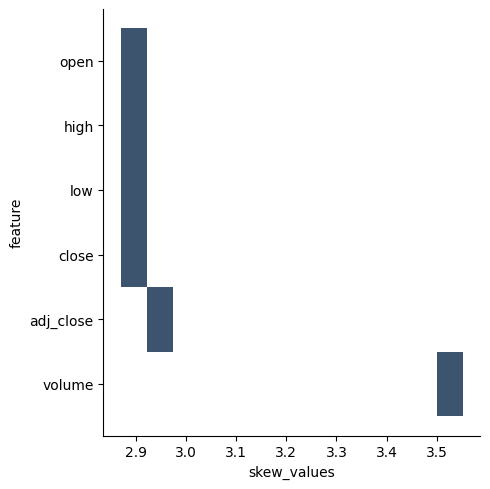

In [21]:
table = pd.DataFrame()
table = raw_aapl_df.skew(numeric_only=True).reset_index()
table.columns = ['feature', 'skew_values']
display(table)

sns.displot(data=table, x='skew_values', y='feature');

#### Tesla

,feature,skew_values
0,open,1.821943
1,high,1.820862
2,low,1.821147
3,close,1.820062
4,adj_close,1.820062
5,volume,2.343361


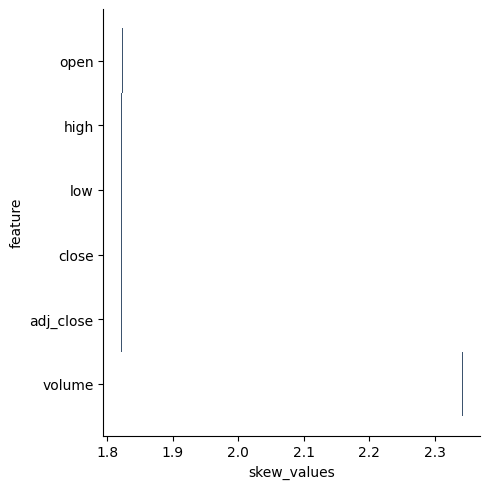

In [22]:
table = pd.DataFrame()
table = raw_tsla_df.skew(numeric_only=True).reset_index()
table.columns = ['feature', 'skew_values']
display(table)

sns.displot(data=table, x='skew_values', y='feature');

#### Esports Gaming Group

,feature,skew_values
0,open,2.228769
1,high,2.126755
2,low,2.286895
3,close,2.211915
4,adj_close,2.211915
5,volume,22.616633


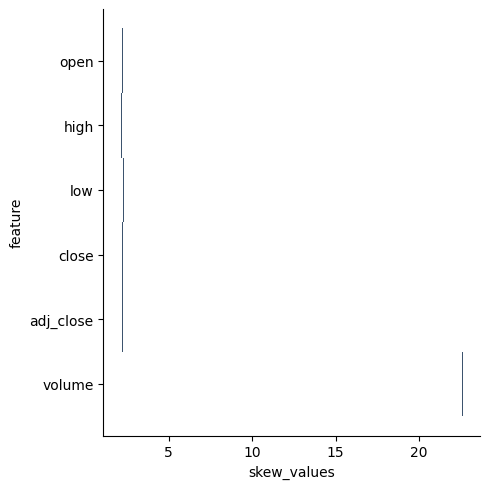

In [23]:
table = pd.DataFrame()
table = raw_gmbl_df.skew(numeric_only=True).reset_index()
table.columns = ['feature', 'skew_values']
display(table)

sns.displot(data=table, x='skew_values', y='feature');

### Split dates for raw data

In [24]:
raw_aapl_df = split_date(raw_aapl_df, target_col='date')
raw_tsla_df = split_date(raw_tsla_df, target_col='date')
raw_gmbl_df = split_date(raw_gmbl_df, target_col='date')

### Correaltion

#### Apple

In [25]:
correlations = raw_aapl_df.corr(numeric_only=True)
correlations

,open,high,low,close,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end
open,1.000000,0.999939,0.999923,0.999839,0.999551,-0.214530,0.655686,0.022228,0.000840,0.022692,0.004143,0.001638
high,0.999939,1.000000,0.999911,0.999924,0.999663,-0.214008,0.655260,0.022050,0.000924,0.022523,0.004116,0.001778
low,0.999923,0.999911,1.000000,0.999927,0.999620,-0.215379,0.656081,0.022276,0.000988,0.022811,0.004094,0.001736
close,0.999839,0.999924,0.999927,1.000000,0.999718,-0.214706,0.655648,0.022142,0.000941,0.022687,0.004142,0.001772
adj_close,0.999551,0.999663,0.999620,0.999718,1.000000,-0.217177,0.642958,0.022119,0.000974,0.022639,0.004149,0.001760
volume,-0.214530,-0.214008,-0.215379,-0.214706,-0.217177,1.000000,0.144835,-0.056326,-0.011531,-0.041613,-0.012448,-0.007512
date_year,0.655686,0.655260,0.656081,0.655648,0.642958,0.144835,1.000000,-0.006603,-0.001524,-0.005624,0.002670,0.000970
date_month,0.022228,0.022050,0.022276,0.022142,0.022119,-0.056326,-0.006603,1.000000,0.000346,0.971167,0.023320,0.001703
date_day,0.000840,0.000924,0.000988,0.000941,0.000974,-0.011531,-0.001524,0.000346,1.000000,0.005197,-0.298528,0.312208
date_quarter,0.022692,0.022523,0.022811,0.022687,0.022639,-0.041613,-0.005624,0.971167,0.005197,1.000000,0.019555,0.001160


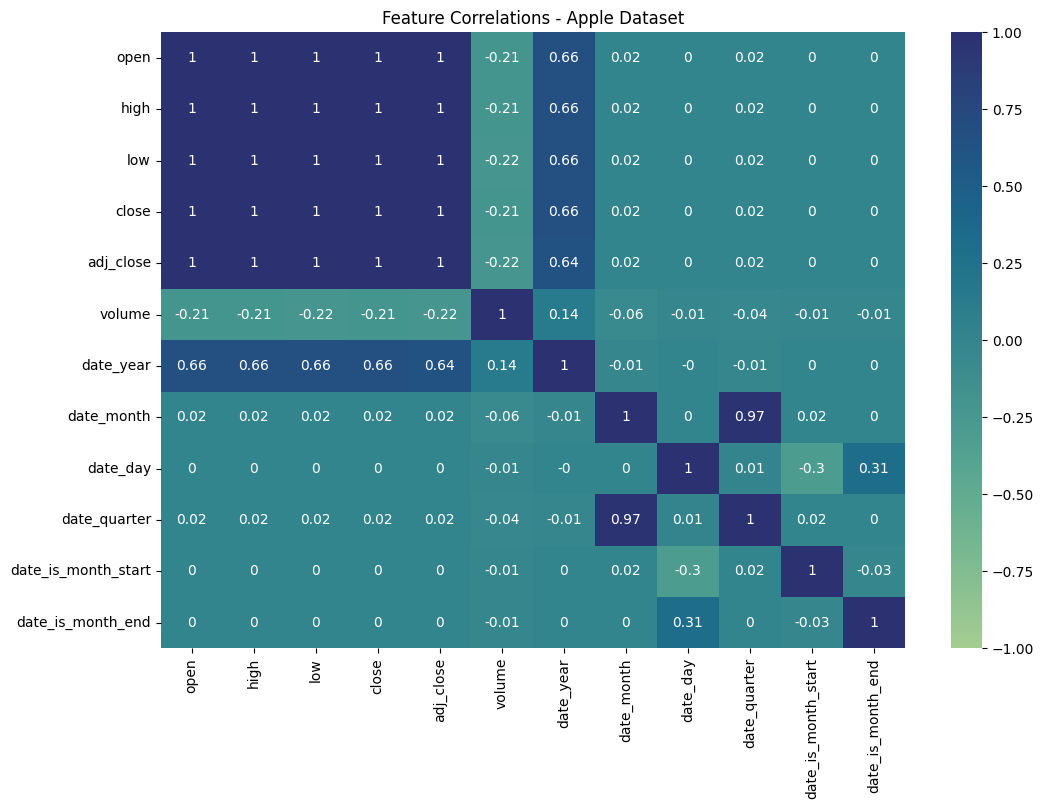

In [26]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlations.round(2), vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Feature Correlations - Apple Dataset');

In [27]:
correlations = aapl_df.corr(numeric_only=True)
correlations

,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns_prc,day_num,high_low_diff_mean,high_low_diff_std,...,lag_2_open_close_diff,lag_3_open_close_diff,volume,lag_1_volume,lag_2_volume,lag_3_volume,adj_close,lag_1_adj_close,lag_2_adj_close,lag_3_adj_close
date_year,1.000000,-0.005814,-0.001605,-0.004962,0.002583,0.000877,0.030765,0.999716,0.568449,0.496468,...,-0.004300,0.003996,-0.012724,-0.017154,-0.017154,-0.017154,0.044356,-0.000851,-0.043421,-0.049043
date_month,-0.005814,1.000000,0.000419,0.971159,0.023408,0.001788,-0.014204,0.017899,0.013311,0.027643,...,0.003204,-0.000355,-0.011442,0.015428,0.015428,0.015428,-0.000534,0.000982,-0.000119,-0.002547
date_day,-0.001605,0.000419,1.000000,0.005259,-0.298540,0.312204,-0.017079,0.000382,-0.004747,-0.002837,...,0.000283,0.004306,0.007307,0.001392,0.001392,0.001392,-0.021073,0.007489,0.014982,0.008919
date_quarter,-0.004962,0.971159,0.005259,1.000000,0.019627,0.001230,-0.011276,0.018080,0.010431,0.026756,...,0.003554,-0.000766,-0.006835,0.012940,0.012940,0.012940,0.008807,0.000754,-0.009215,-0.010697
date_is_month_start,0.002583,0.023408,-0.298540,0.019627,1.000000,-0.032937,0.027178,0.002543,0.004810,0.011717,...,-0.000489,0.003430,-0.017634,-0.001719,-0.001719,-0.001719,0.016190,-0.006758,-0.010738,-0.012456
date_is_month_end,0.000877,0.001788,0.312204,0.001230,-0.032937,1.000000,0.002781,0.001537,0.004118,0.016252,...,0.002256,-0.002137,0.021996,-0.001805,-0.001805,-0.001805,-0.004208,0.001878,0.002677,-0.004401
returns_prc,0.030765,-0.014204,-0.017079,-0.011276,0.027178,0.002781,1.000000,0.030381,0.008150,0.001686,...,0.334195,0.173030,0.035786,0.000250,0.000250,0.000250,0.636774,-0.493471,-0.243119,-0.064431
day_num,0.999716,0.017899,0.000382,0.018080,0.002543,0.001537,0.030381,1.000000,0.568316,0.496735,...,-0.004221,0.003986,-0.012993,-0.016807,-0.016807,-0.016807,0.044271,-0.000810,-0.043366,-0.049062
high_low_diff_mean,0.568449,0.013311,-0.004747,0.010431,0.004810,0.004118,0.008150,0.568316,1.000000,0.883990,...,0.001335,0.008565,-0.005633,-0.003942,-0.003942,-0.003942,-0.004326,-0.003313,0.006854,0.006216
high_low_diff_std,0.496468,0.027643,-0.002837,0.026756,0.011717,0.016252,0.001686,0.496735,0.883990,1.000000,...,-0.004127,0.004552,0.010472,-0.003484,-0.003484,-0.003484,-0.003281,0.005344,-0.000979,-0.008048


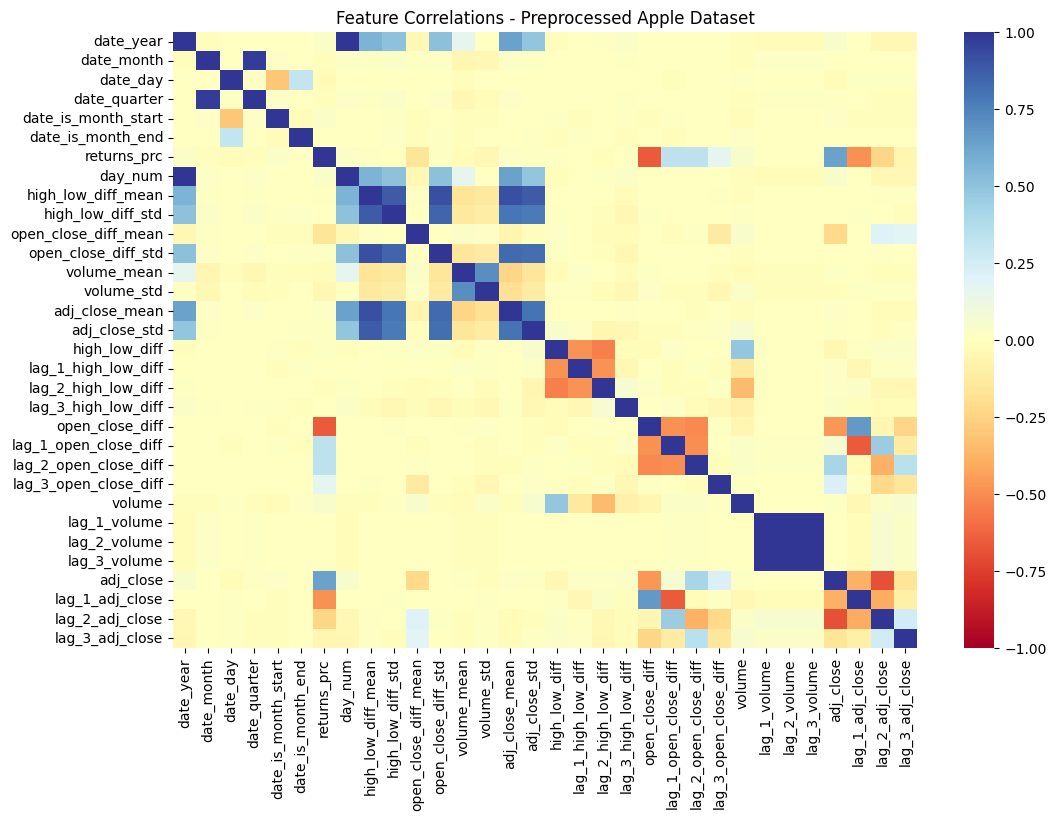

In [28]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlations.round(2), vmin=-1, vmax=1, cmap='RdYlBu')
heatmap.set_title('Feature Correlations - Preprocessed Apple Dataset');

#### Tesla

In [29]:
correlations = raw_tsla_df.corr(numeric_only=True)
correlations

,open,high,low,close,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end
open,1.000000,0.999725,0.999597,0.999191,0.999191,0.064499,0.721638,0.012667,-0.003316,0.012511,0.011694,0.001084
high,0.999725,1.000000,0.999608,0.999635,0.999635,0.068149,0.721938,0.011788,-0.002357,0.011656,0.011223,0.001867
low,0.999597,0.999608,1.000000,0.999675,0.999675,0.060838,0.721528,0.013620,-0.002043,0.013515,0.011606,0.001825
close,0.999191,0.999635,0.999675,1.000000,1.000000,0.065311,0.721767,0.012884,-0.001571,0.012726,0.011302,0.002398
adj_close,0.999191,0.999635,0.999675,1.000000,1.000000,0.065311,0.721767,0.012884,-0.001571,0.012726,0.011302,0.002398
volume,0.064499,0.068149,0.060838,0.065311,0.065311,1.000000,0.396468,-0.081195,-0.037511,-0.076134,-0.007213,-0.009977
date_year,0.721638,0.721938,0.721528,0.721767,0.721767,0.396468,1.000000,-0.076803,-0.000854,-0.075775,-0.000162,-0.003725
date_month,0.012667,0.011788,0.013620,0.012884,0.012884,-0.081195,-0.076803,1.000000,-0.000501,0.971206,0.021518,-0.001937
date_day,-0.003316,-0.002357,-0.002043,-0.001571,-0.001571,-0.037511,-0.000854,-0.000501,1.000000,0.003488,-0.302248,0.314894
date_quarter,0.012511,0.011656,0.013515,0.012726,0.012726,-0.076134,-0.075775,0.971206,0.003488,1.000000,0.018184,-0.002651


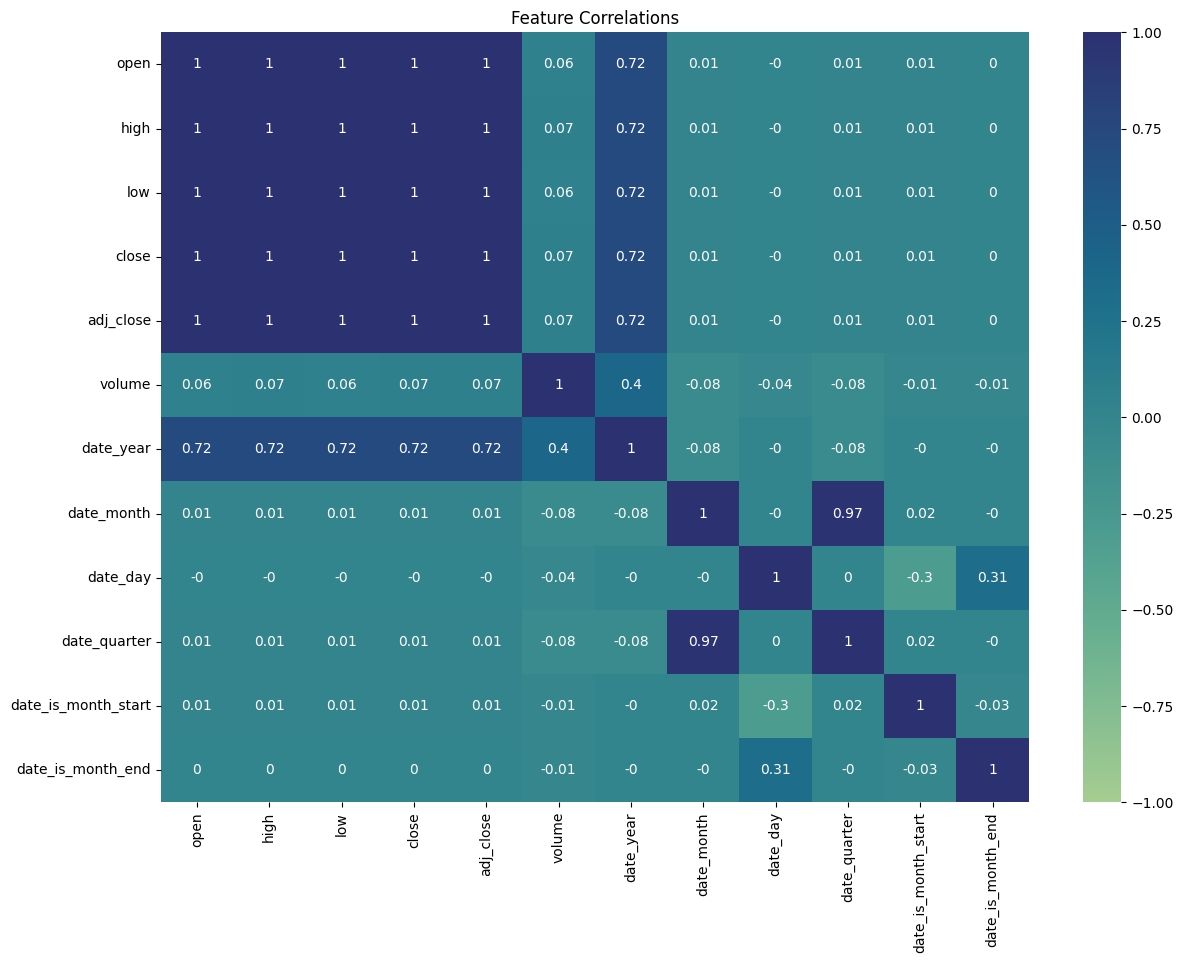

In [30]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlations.round(2), vmin=-1, vmax=1, annot=True, cmap='crest')
heatmap.set_title('Feature Correlations');

In [31]:
correlations = tsla_df.corr(numeric_only=True)
correlations

,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns_prc,day_num,high_low_diff_mean,high_low_diff_std,...,lag_2_open_close_diff,lag_3_open_close_diff,volume,lag_1_volume,lag_2_volume,lag_3_volume,adj_close,lag_1_adj_close,lag_2_adj_close,lag_3_adj_close
date_year,1.000000,-0.077051,-0.000062,-0.076197,0.002686,-0.001041,0.010749,0.996827,0.669507,0.566420,...,0.029953,0.033247,0.005550,-0.030645,-0.030645,-0.030645,-0.001361,-0.030273,-0.030064,-0.053843
date_month,-0.077051,1.000000,-0.000263,0.971246,0.021413,-0.001642,-0.002533,0.002272,-0.020104,0.001237,...,-0.003207,-0.000412,-0.012795,0.001919,0.001919,0.001919,-0.010712,0.002297,0.003332,-0.019299
date_day,-0.000062,-0.000263,1.000000,0.004193,-0.300960,0.313943,0.041305,0.006539,-0.010076,0.016007,...,0.031843,0.028961,-0.033691,-0.027901,-0.027901,-0.027901,0.026471,-0.027012,-0.032003,-0.027705
date_quarter,-0.076197,0.971246,0.004193,1.000000,0.017499,-0.001846,-0.003012,0.000886,-0.022681,0.005182,...,-0.008111,-0.005866,-0.014871,0.007263,0.007263,0.007263,-0.007716,0.007488,0.008197,-0.012739
date_is_month_start,0.002686,0.021413,-0.300960,0.017499,1.000000,-0.033415,-0.028376,0.002393,0.005546,-0.000545,...,-0.005814,0.001231,0.014228,-0.003176,-0.003176,-0.003176,-0.005113,0.001474,-0.005108,-0.007514
date_is_month_end,-0.001041,-0.001642,0.313943,-0.001846,-0.033415,1.000000,0.014684,0.000904,0.000935,0.005326,...,0.000693,-0.004291,-0.011592,-0.003323,-0.003323,-0.003323,0.006800,-0.006080,-0.002669,-0.002863
returns_prc,0.010749,-0.002533,0.041305,-0.003012,-0.028376,0.014684,1.000000,0.010829,-0.033703,-0.034020,...,0.241724,0.165368,-0.000345,-0.118439,-0.118439,-0.118439,0.613986,-0.215450,-0.154281,-0.119135
day_num,0.996827,0.002272,0.006539,0.000886,0.002393,0.000904,0.010829,1.000000,0.670015,0.568468,...,0.030003,0.033510,0.004309,-0.030773,-0.030773,-0.030773,-0.002100,-0.030363,-0.030097,-0.055708
high_low_diff_mean,0.669507,-0.020104,-0.010076,-0.022681,0.005546,0.000935,-0.033703,0.670015,1.000000,0.878044,...,0.009914,0.010647,0.014416,-0.008761,-0.008761,-0.008761,-0.036275,-0.008277,-0.003194,-0.007293
high_low_diff_std,0.566420,0.001237,0.016007,0.005182,-0.000545,0.005326,-0.034020,0.568468,0.878044,1.000000,...,0.010593,0.010244,0.034886,-0.008381,-0.008381,-0.008381,-0.018068,-0.005312,-0.007232,-0.012804


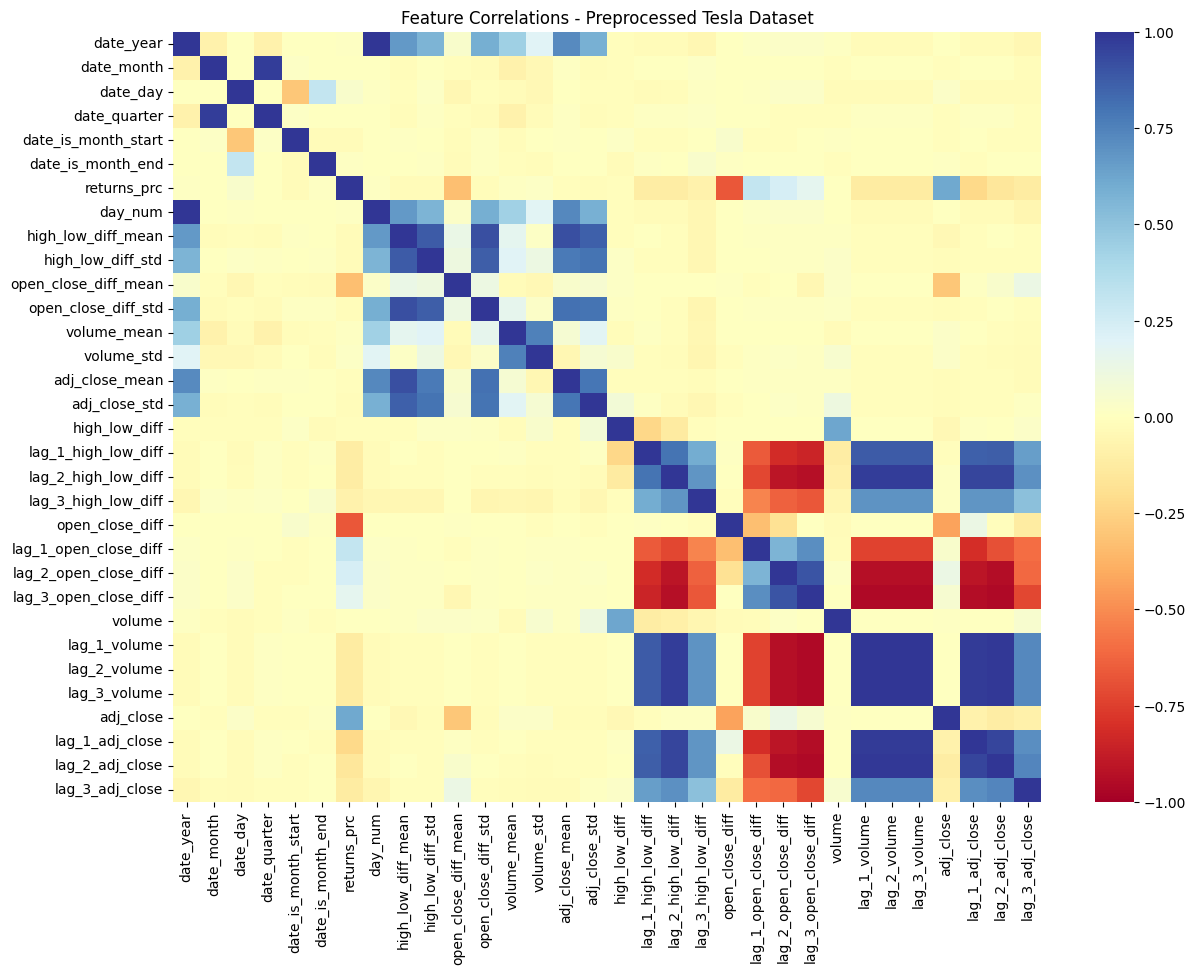

In [32]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlations.round(2), vmin=-1, vmax=1, cmap='RdYlBu')
heatmap.set_title('Feature Correlations - Preprocessed Tesla Dataset');

#### Esports Gaming Group

In [33]:
correlations = raw_gmbl_df.corr(numeric_only=True)
correlations

,open,high,low,close,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end
open,1.000000,0.995568,0.992051,0.992870,0.992870,-0.090199,-0.675269,0.062800,0.009100,0.067238,0.009400,-0.003723
high,0.995568,1.000000,0.988765,0.994720,0.994720,-0.089693,-0.680500,0.053635,0.011258,0.057079,0.008331,-0.000405
low,0.992051,0.988765,1.000000,0.995051,0.995051,-0.089441,-0.666519,0.062517,0.014632,0.066035,0.006136,-0.006063
close,0.992870,0.994720,0.995051,1.000000,1.000000,-0.090161,-0.675946,0.055008,0.013716,0.058679,0.008888,-0.004472
adj_close,0.992870,0.994720,0.995051,1.000000,1.000000,-0.090161,-0.675946,0.055008,0.013716,0.058679,0.008888,-0.004472
volume,-0.090199,-0.089693,-0.089441,-0.090161,-0.090161,1.000000,0.169408,-0.079366,0.057520,-0.068982,-0.012908,0.033368
date_year,-0.675269,-0.680500,-0.666519,-0.675946,-0.675946,0.169408,1.000000,-0.171217,-0.012806,-0.168829,0.004829,-0.001190
date_month,0.062800,0.053635,0.062517,0.055008,0.055008,-0.079366,-0.171217,1.000000,0.001876,0.971786,0.021275,-0.000205
date_day,0.009100,0.011258,0.014632,0.013716,0.013716,0.057520,-0.012806,0.001876,1.000000,0.008295,-0.304671,0.312470
date_quarter,0.067238,0.057079,0.066035,0.058679,0.058679,-0.068982,-0.168829,0.971786,0.008295,1.000000,0.016718,0.002972


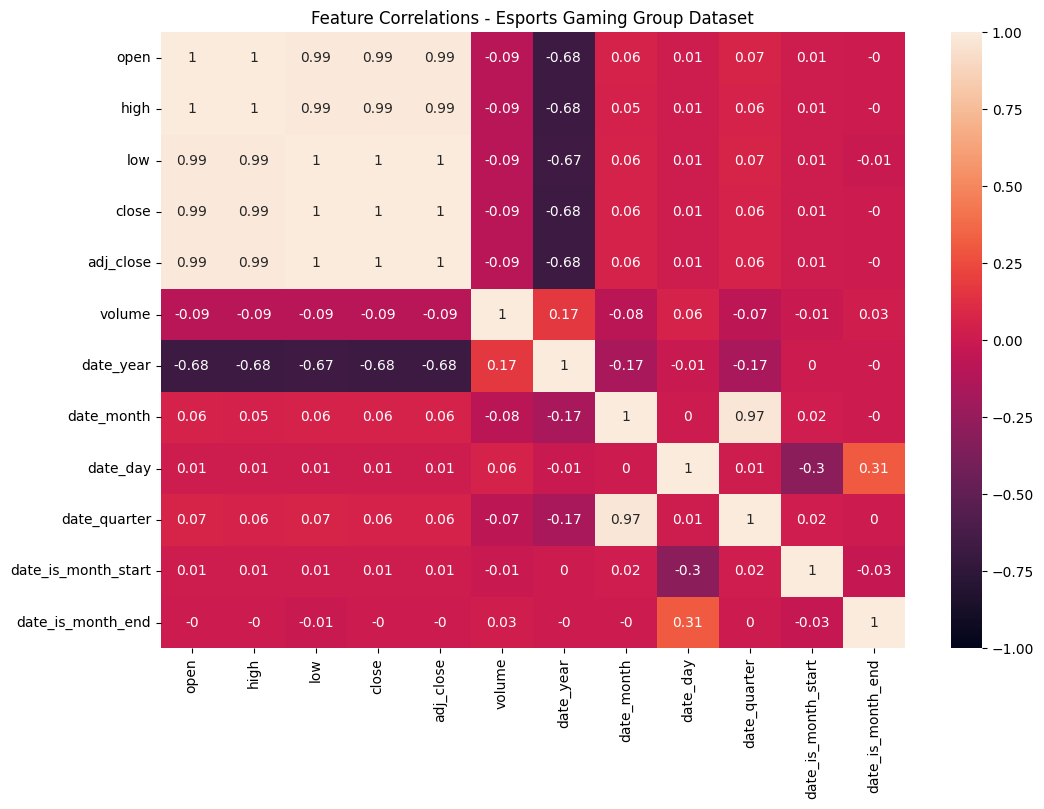

In [34]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlations.round(2), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlations - Esports Gaming Group Dataset');

In [35]:
correlations = gmbl_df.corr(numeric_only=True)
correlations

,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns_prc,day_num,high_low_diff_mean,high_low_diff_std,...,lag_2_open_close_diff,lag_3_open_close_diff,volume,lag_1_volume,lag_2_volume,lag_3_volume,adj_close,lag_1_adj_close,lag_2_adj_close,lag_3_adj_close
date_year,1.000000,-0.171478,-0.010353,-0.167995,0.004170,-0.001892,0.002195,0.983465,-0.481227,-0.578551,...,-0.046379,0.063203,-0.038529,-0.046501,-0.046501,-0.049952,-0.013452,0.046222,0.046598,-0.049517
date_month,-0.171478,1.000000,0.001763,0.971877,0.021307,-0.000173,-0.062688,0.009136,-0.039089,-0.021173,...,0.002121,0.009320,0.008431,0.002110,0.002109,-0.030898,-0.018527,-0.001704,-0.002082,-0.008726
date_day,-0.010353,0.001763,1.000000,0.007758,-0.304581,0.312915,0.020269,0.004927,-0.050227,-0.055586,...,0.028085,-0.001521,-0.001214,0.028163,0.028166,0.022511,-0.011014,-0.027770,-0.028180,-0.013462
date_quarter,-0.167995,0.971877,0.007758,1.000000,0.016868,0.003124,-0.068193,0.007649,-0.045680,-0.030121,...,0.010110,0.015320,0.015160,0.010101,0.010100,-0.029146,-0.020290,-0.009690,-0.010072,-0.007857
date_is_month_start,0.004170,0.021307,-0.304581,0.016868,1.000000,-0.033823,0.014175,0.003513,0.029603,0.045889,...,-0.004798,0.009556,-0.027052,-0.004839,-0.004852,-0.008141,0.023718,0.004225,0.004825,-0.013218
date_is_month_end,-0.001892,-0.000173,0.312915,0.003124,-0.033823,1.000000,0.033225,0.002792,0.002778,0.016550,...,-0.004988,0.001855,0.075250,-0.005026,-0.005022,-0.008425,0.005671,0.004590,0.005038,-0.003211
returns_prc,0.002195,-0.062688,0.020269,-0.068193,0.014175,0.033225,1.000000,-0.009012,-0.057277,-0.038641,...,0.000838,-0.002345,0.021418,-0.000102,-0.000097,0.002509,0.469963,-0.011810,-0.000520,0.021564
day_num,0.983465,0.009136,0.004927,0.007649,0.003513,0.002792,-0.009012,1.000000,-0.496407,-0.591791,...,-0.046314,0.065819,-0.037660,-0.046439,-0.046439,-0.056006,-0.017277,0.046236,0.046542,-0.052032
high_low_diff_mean,-0.481227,-0.039089,-0.050227,-0.045680,0.029603,0.002778,-0.057277,-0.496407,1.000000,0.781163,...,0.007577,0.039432,-0.007175,0.007678,0.007676,-0.017789,0.006993,-0.006861,-0.007779,0.018067
high_low_diff_std,-0.578551,-0.021173,-0.055586,-0.030121,0.045889,0.016550,-0.038641,-0.591791,0.781163,1.000000,...,-0.019576,0.021756,0.015122,-0.019541,-0.019544,-0.032799,0.007949,0.019674,0.019498,0.050980


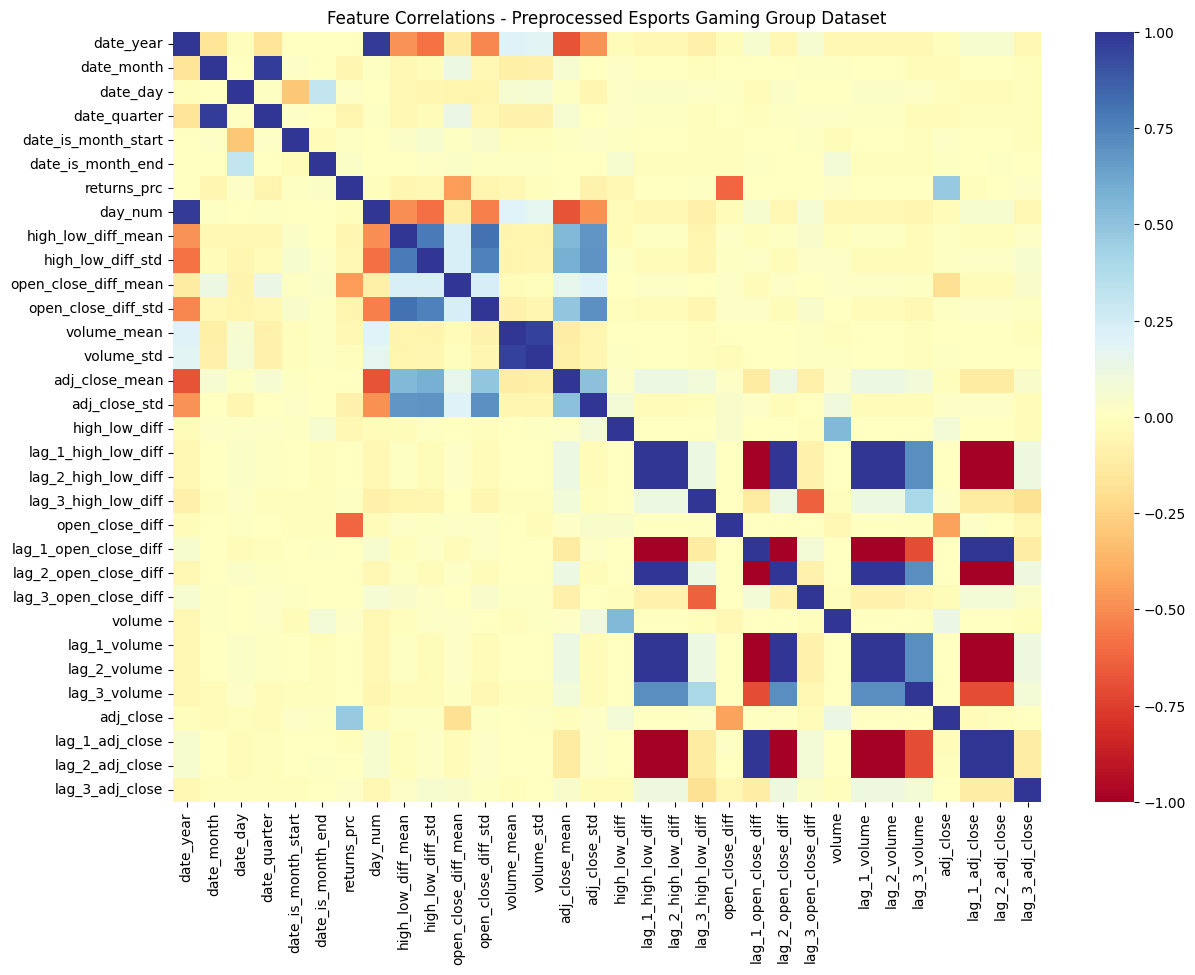

In [36]:
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(correlations.round(2), vmin=-1, vmax=1, cmap='RdYlBu')
heatmap.set_title('Feature Correlations - Preprocessed Esports Gaming Group Dataset');

### Data subset for plot

In [37]:
# NOTE: Creating a mask to create subset of data to produce uncluttered plots
year_since = 2012
mask = 'date_year > @year_since'

### Volume over time

#### Apple

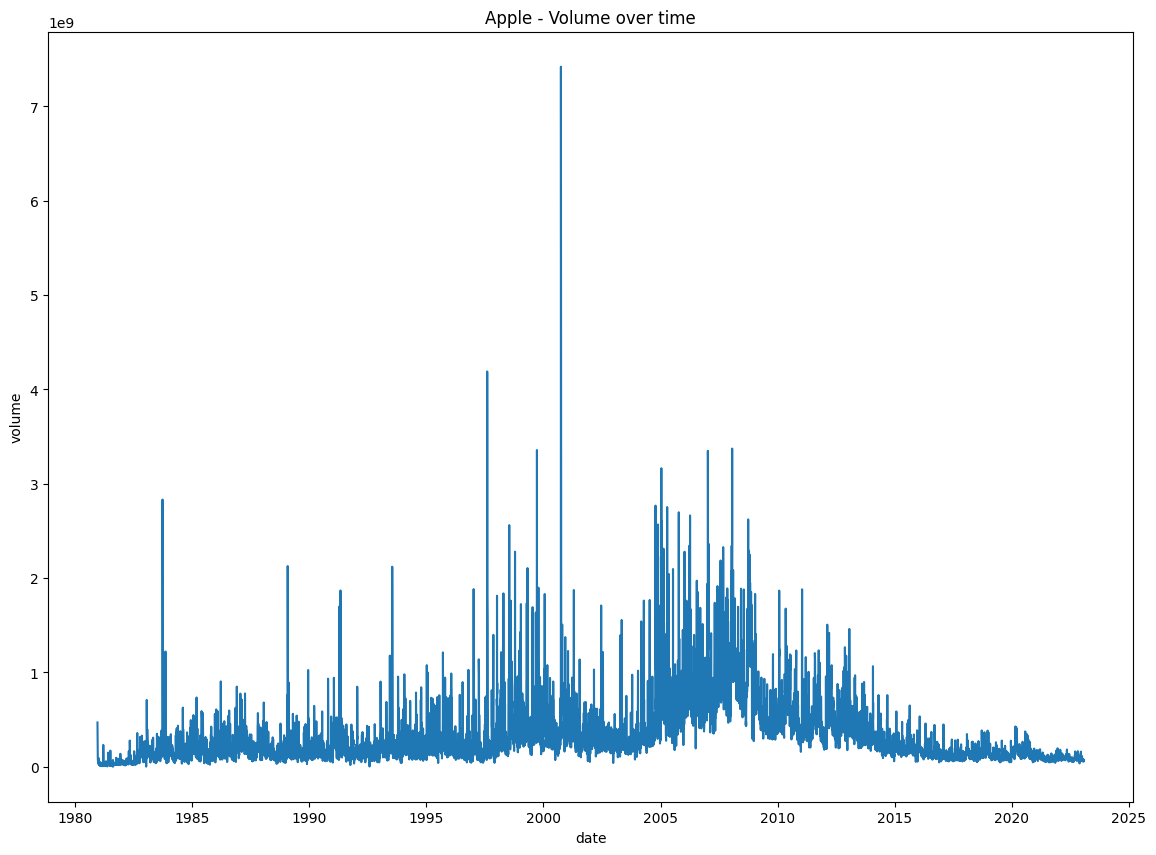

In [38]:
plt.figure(figsize=(14, 10))
plot = sns.lineplot(x=raw_aapl_df.date, y=raw_aapl_df.volume)
plot.set_title('Apple - Volume over time');

#### Tesla

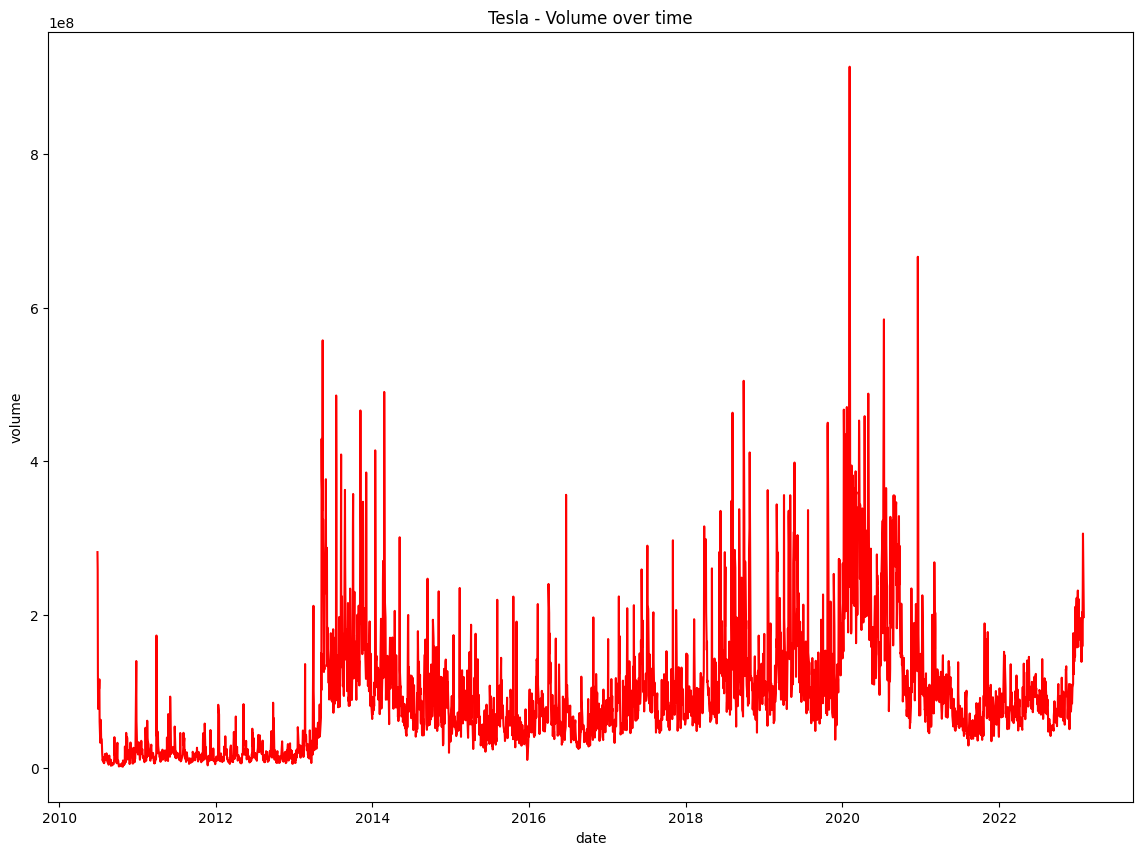

In [39]:
plt.figure(figsize=(14, 10))
plot = sns.lineplot(x=raw_tsla_df.date, y=raw_tsla_df.volume, color='r')
plot.set_title('Tesla - Volume over time');

#### Esports Gaming Group

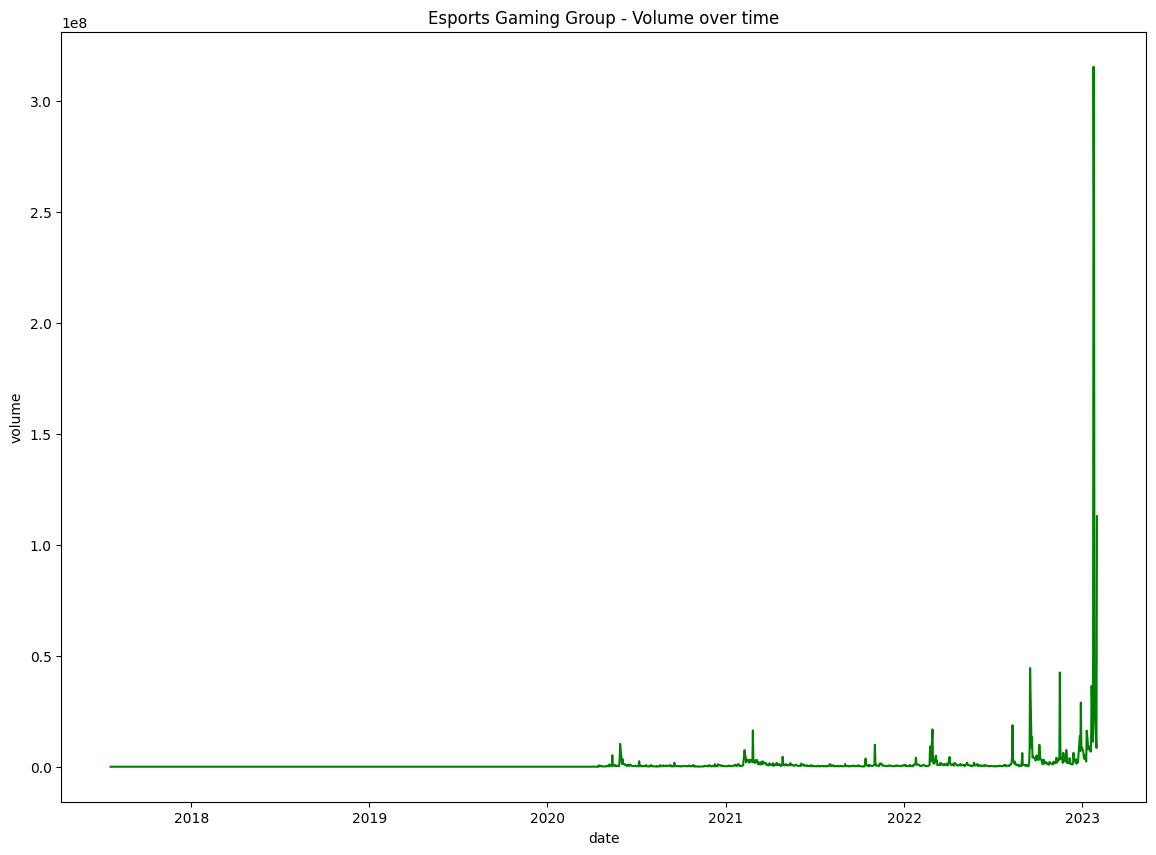

In [40]:
plt.figure(figsize=(14, 10))
plot = sns.lineplot(x=raw_gmbl_df.date, y=raw_gmbl_df.volume, color='g')
plot.set_title('Esports Gaming Group - Volume over time');

### Price over time

#### Apple

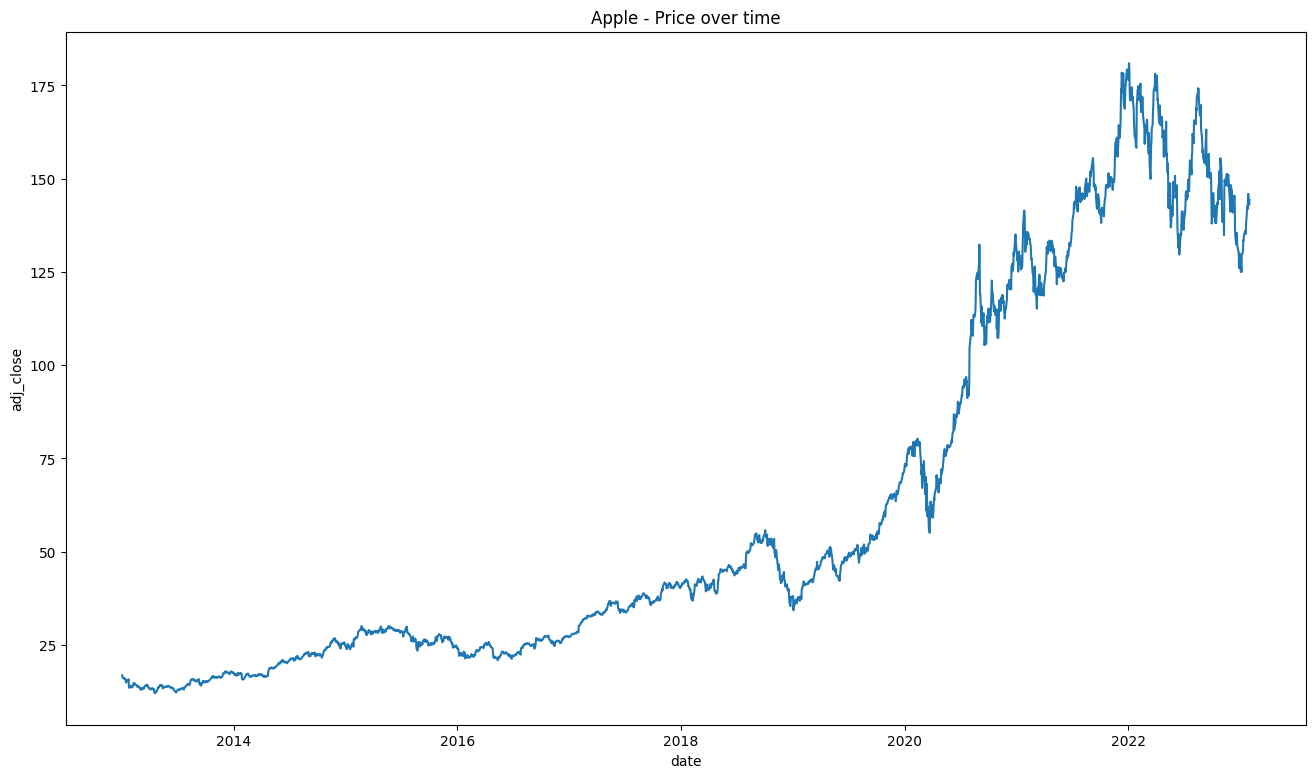

In [41]:
plt.figure(figsize=(16, 9))
plot = sns.lineplot(
    x=raw_aapl_df.query(mask).date,
    y=raw_aapl_df.query(mask).adj_close,
)
plot.set_title('Apple - Price over time');

#### Tesla

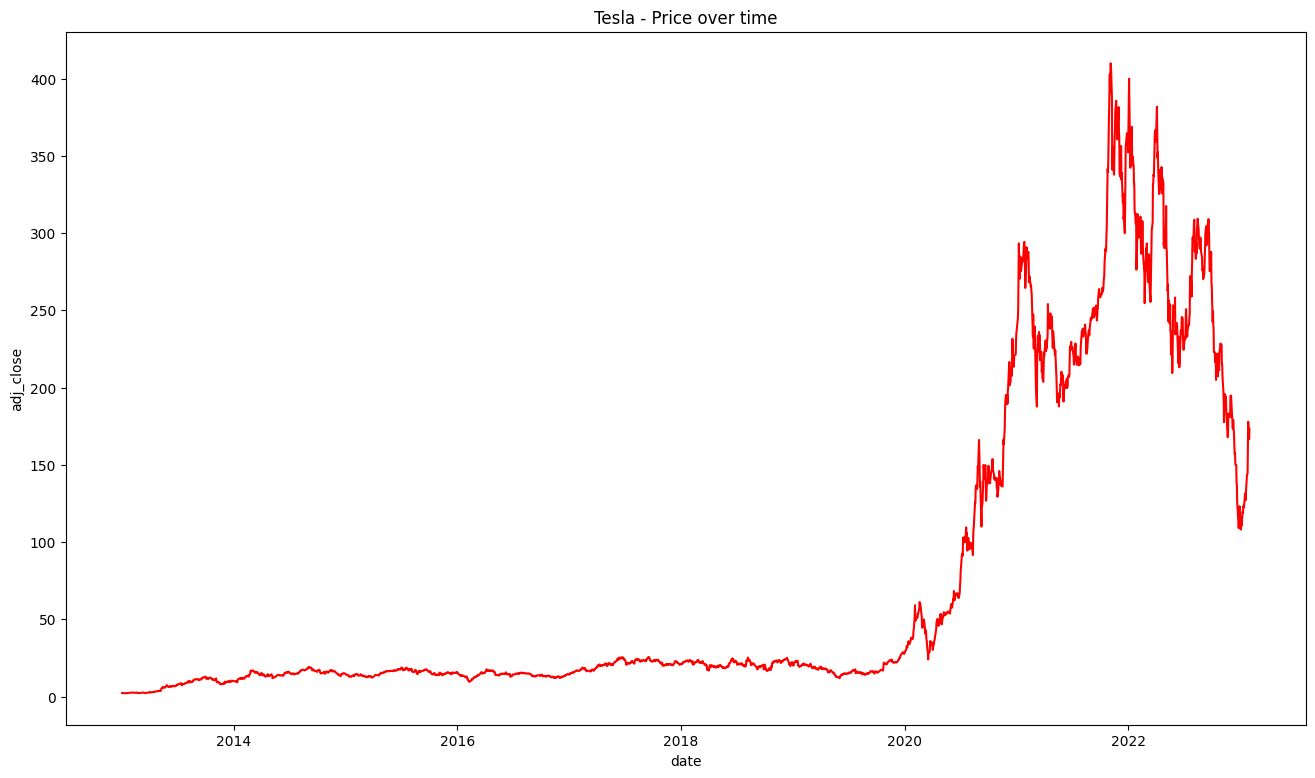

In [42]:
plt.figure(figsize=(16, 9))
plot = sns.lineplot(
    x=raw_tsla_df.query(mask).date,
    y=raw_tsla_df.query(mask).adj_close,
    color='r'
)
plot.set_title('Tesla - Price over time');

#### Esports Gaming Group

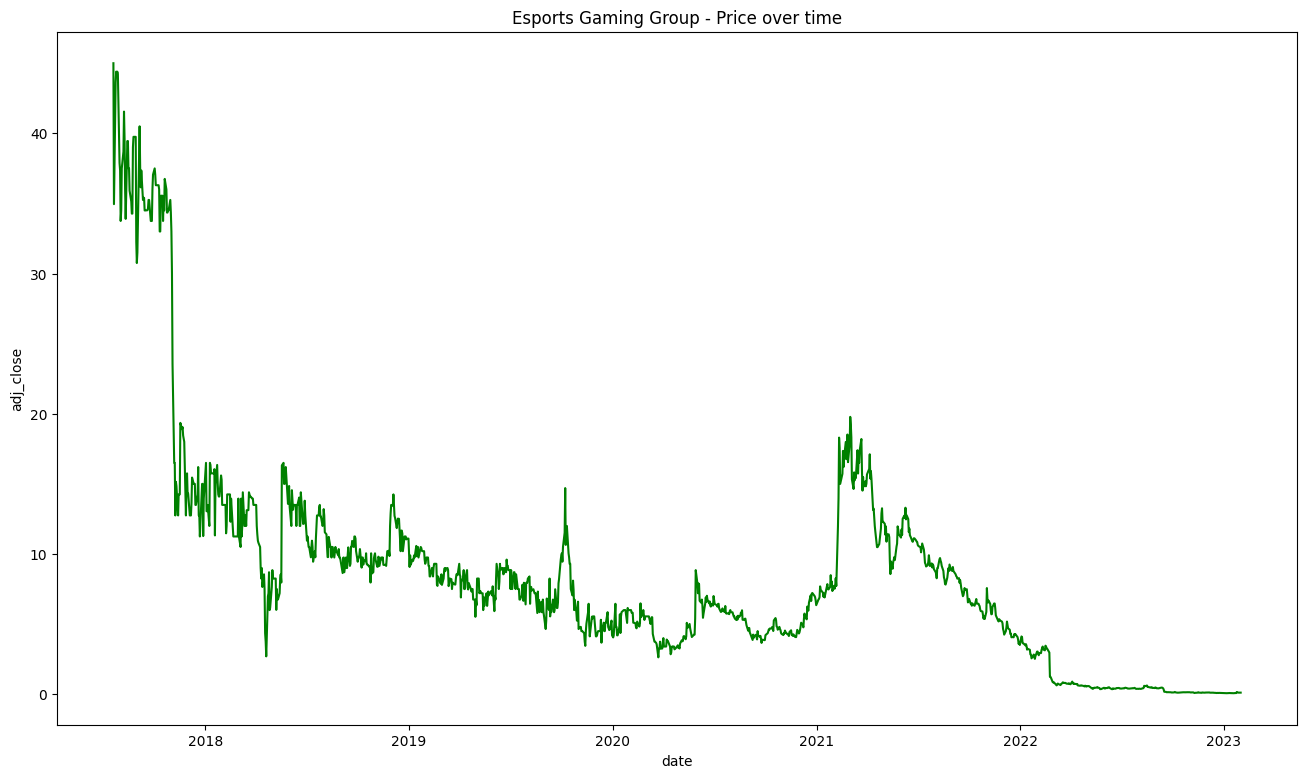

In [43]:
plt.figure(figsize=(16, 9))
plot = sns.lineplot(
    x=raw_gmbl_df.query(mask).date,
    y=raw_gmbl_df.query(mask).adj_close,
    color='g'
)
plot.set_title('Esports Gaming Group - Price over time');

### Price over time

#### Apple

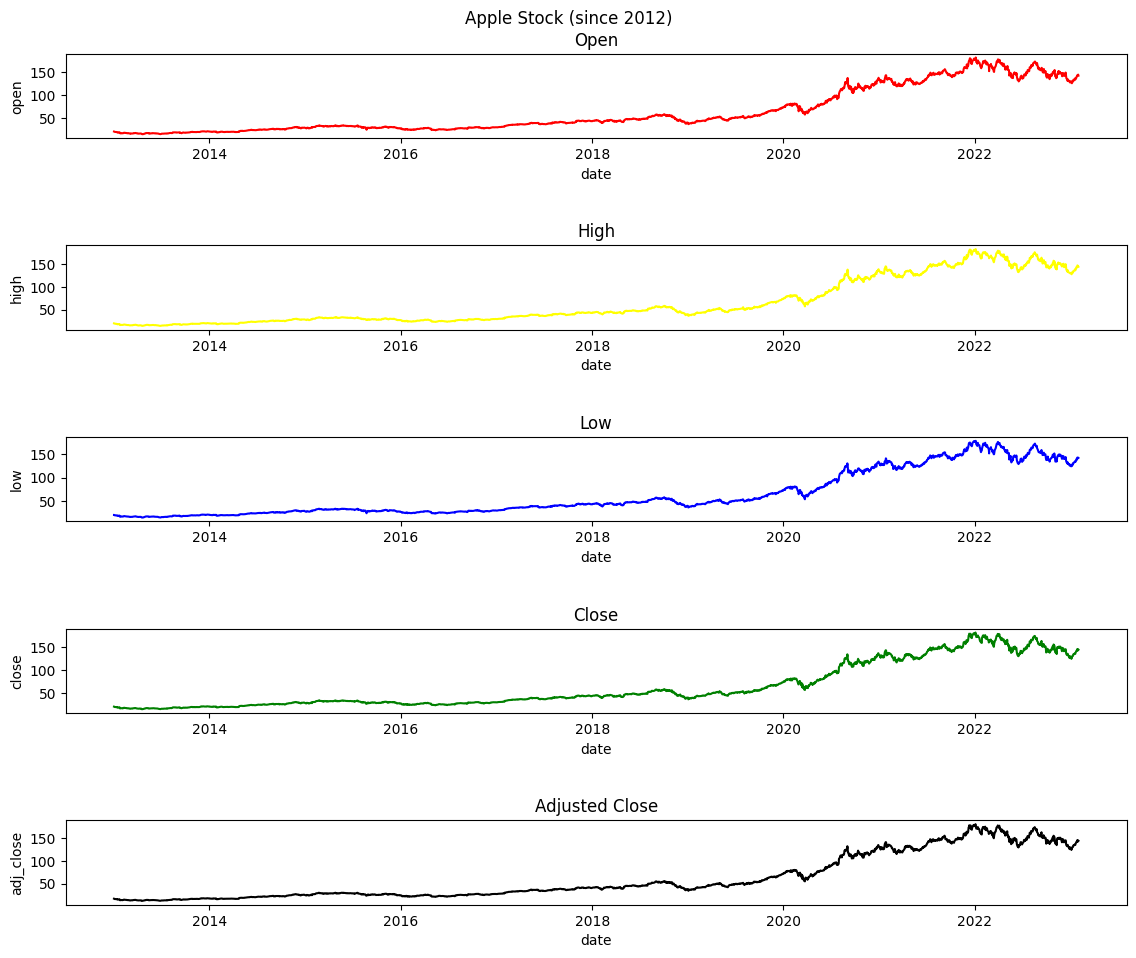

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10))
sns.lineplot(x=raw_aapl_df.query(mask).date,
             y=raw_aapl_df.query(mask).open,
             ax=axes[0],
             color='red')
sns.lineplot(x=raw_aapl_df.query(mask).date,
             y=raw_aapl_df.query(mask).high,
             ax=axes[1],
             color='yellow')
sns.lineplot(x=raw_aapl_df.query(mask).date,
             y=raw_aapl_df.query(mask).low,
             ax=axes[2],
             color='blue')
sns.lineplot(x=raw_aapl_df.query(mask).date,
             y=raw_aapl_df.query(mask).close,
             ax=axes[3],
             color='green')
sns.lineplot(x=raw_aapl_df.query(mask).date,
             y=raw_aapl_df.query(mask).adj_close,
             ax=axes[4],
             color='black')

axes[0].set_title("Open")
axes[1].set_title("High")
axes[2].set_title("Low")
axes[3].set_title("Close")
axes[4].set_title("Adjusted Close")
fig.tight_layout(pad=3)

plt.suptitle(f'Apple Stock (since {year_since})')

plt.show()

#### Tesla

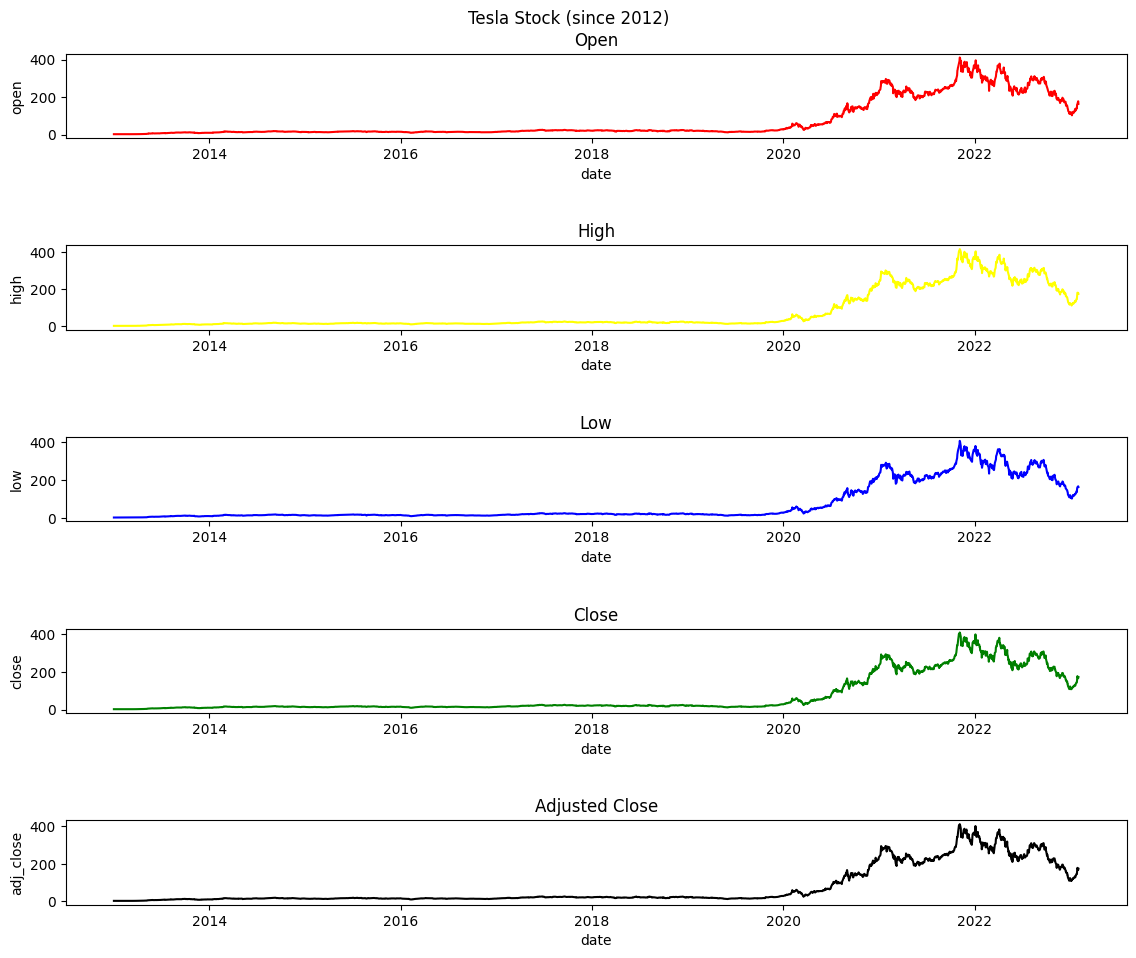

In [45]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10))
sns.lineplot(x=raw_tsla_df.query(mask).date,
             y=raw_tsla_df.query(mask).open,
             ax=axes[0],
             color='red')
sns.lineplot(x=raw_tsla_df.query(mask).date,
             y=raw_tsla_df.query(mask).high,
             ax=axes[1],
             color='yellow')
sns.lineplot(x=raw_tsla_df.query(mask).date,
             y=raw_tsla_df.query(mask).low,
             ax=axes[2],
             color='blue')
sns.lineplot(x=raw_tsla_df.query(mask).date,
             y=raw_tsla_df.query(mask).close,
             ax=axes[3],
             color='green')
sns.lineplot(x=raw_tsla_df.query(mask).date,
             y=raw_tsla_df.query(mask).adj_close,
             ax=axes[4],
             color='black')

axes[0].set_title("Open")
axes[1].set_title("High")
axes[2].set_title("Low")
axes[3].set_title("Close")
axes[4].set_title("Adjusted Close")
fig.tight_layout(pad=3)

plt.suptitle(f'Tesla Stock (since {year_since})')

plt.show()

#### Esports Gaming Group

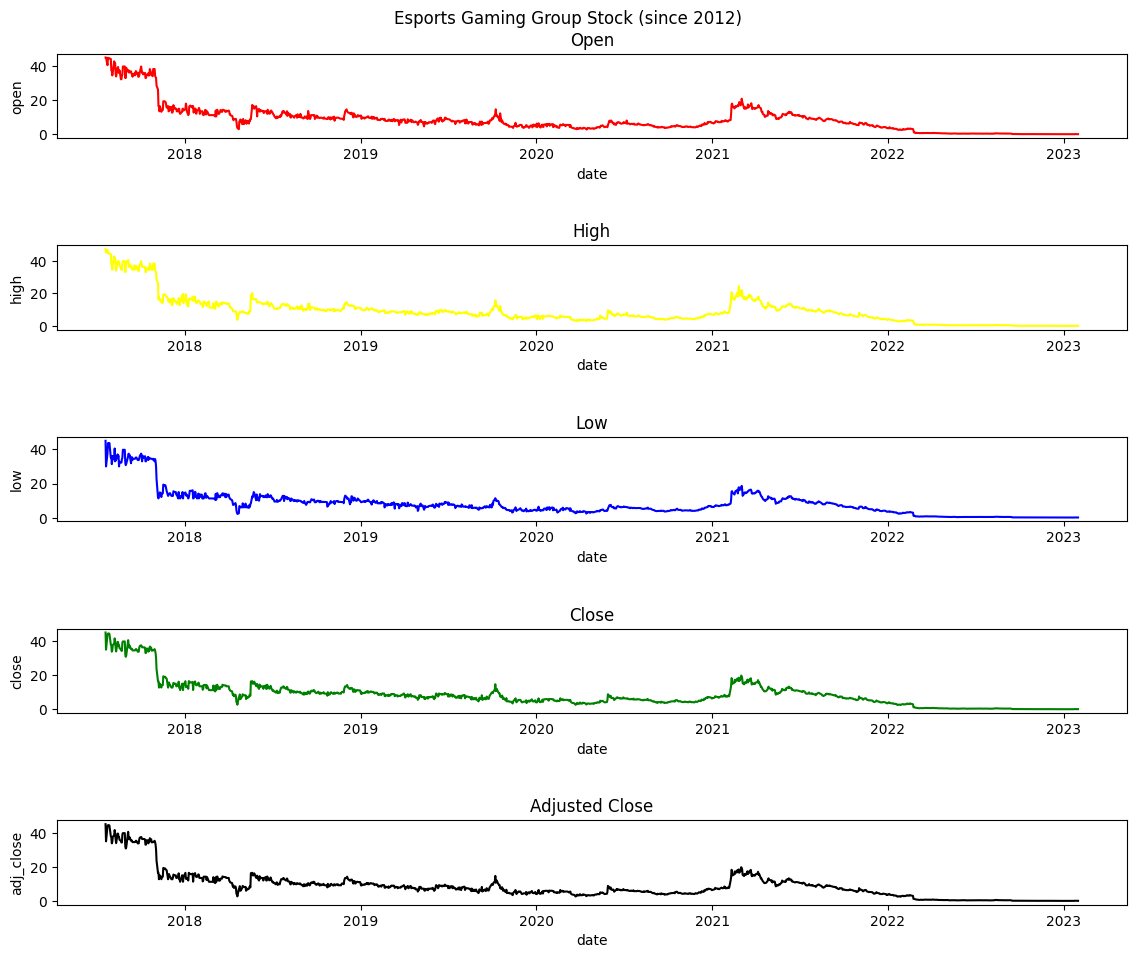

In [46]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 10))
sns.lineplot(x=raw_gmbl_df.query(mask).date,
             y=raw_gmbl_df.query(mask).open,
             ax=axes[0],
             color='red')
sns.lineplot(x=raw_gmbl_df.query(mask).date,
             y=raw_gmbl_df.query(mask).high,
             ax=axes[1],
             color='yellow')
sns.lineplot(x=raw_gmbl_df.query(mask).date,
             y=raw_gmbl_df.query(mask).low,
             ax=axes[2],
             color='blue')
sns.lineplot(x=raw_gmbl_df.query(mask).date,
             y=raw_gmbl_df.query(mask).close,
             ax=axes[3],
             color='green')
sns.lineplot(x=raw_gmbl_df.query(mask).date,
             y=raw_gmbl_df.query(mask).adj_close,
             ax=axes[4],
             color='black')

axes[0].set_title("Open")
axes[1].set_title("High")
axes[2].set_title("Low")
axes[3].set_title("Close")
axes[4].set_title("Adjusted Close")
fig.tight_layout(pad=3)

plt.suptitle(f'Esports Gaming Group Stock (since {year_since})')

plt.show()

### Seasonal Trends

#### Apple

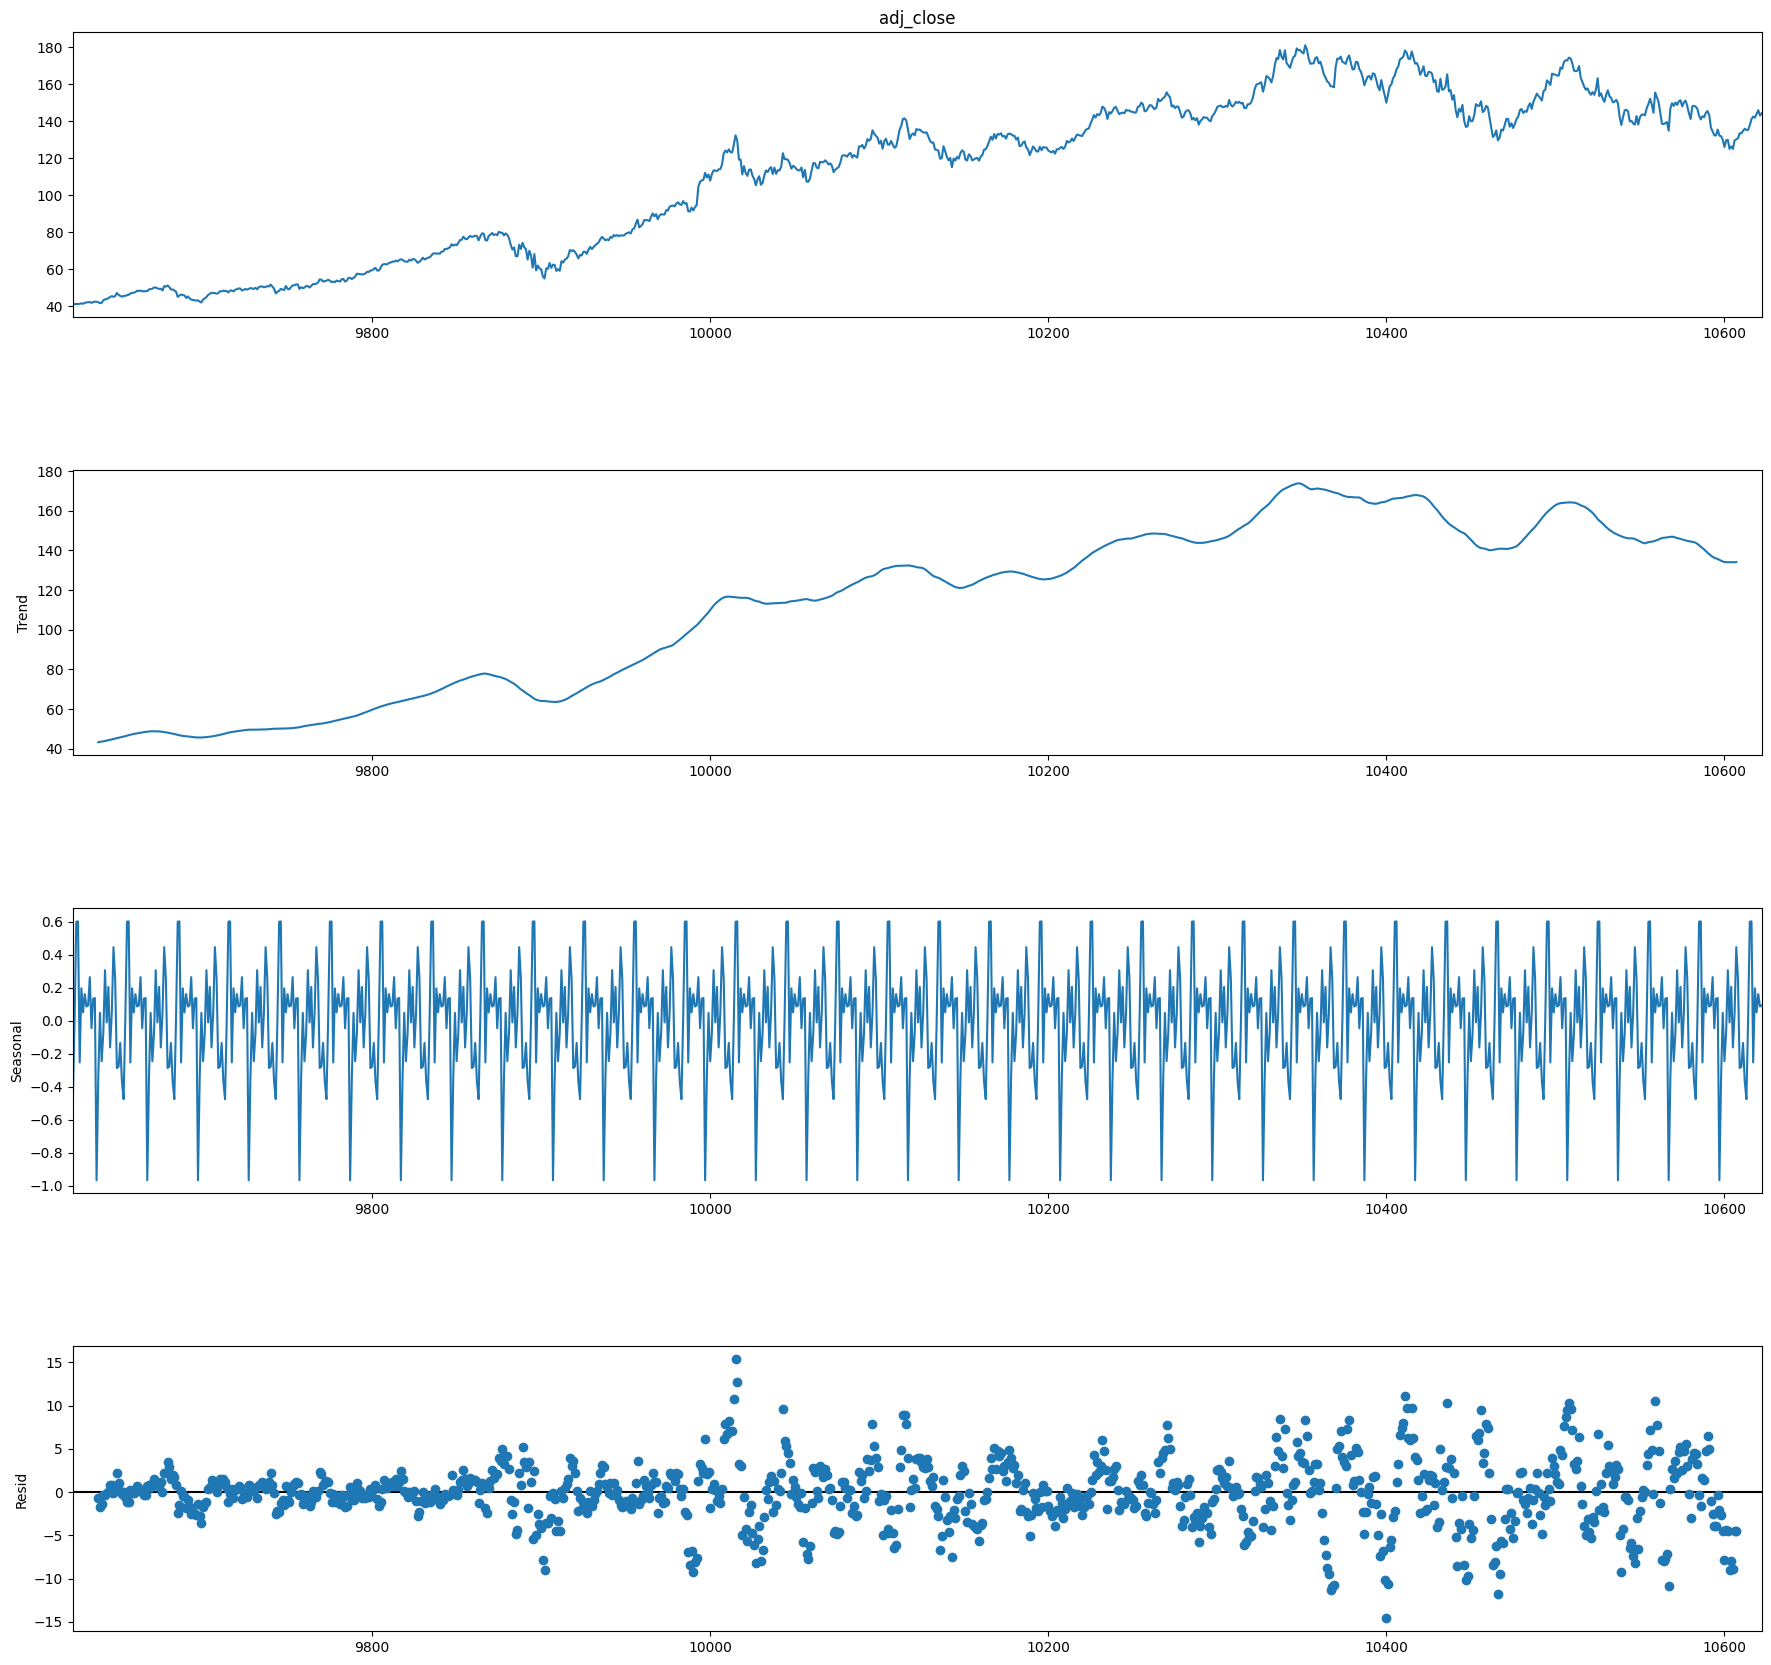

In [47]:
# Last n days visualized
n = 1000
result_data = seasonal_decompose(
    raw_aapl_df.adj_close.tail(n),
    model='additive',
    period=30
)

fig = go.Figure()
fig = result_data.plot()
fig.set_size_inches(20, 19)

#### Tesla

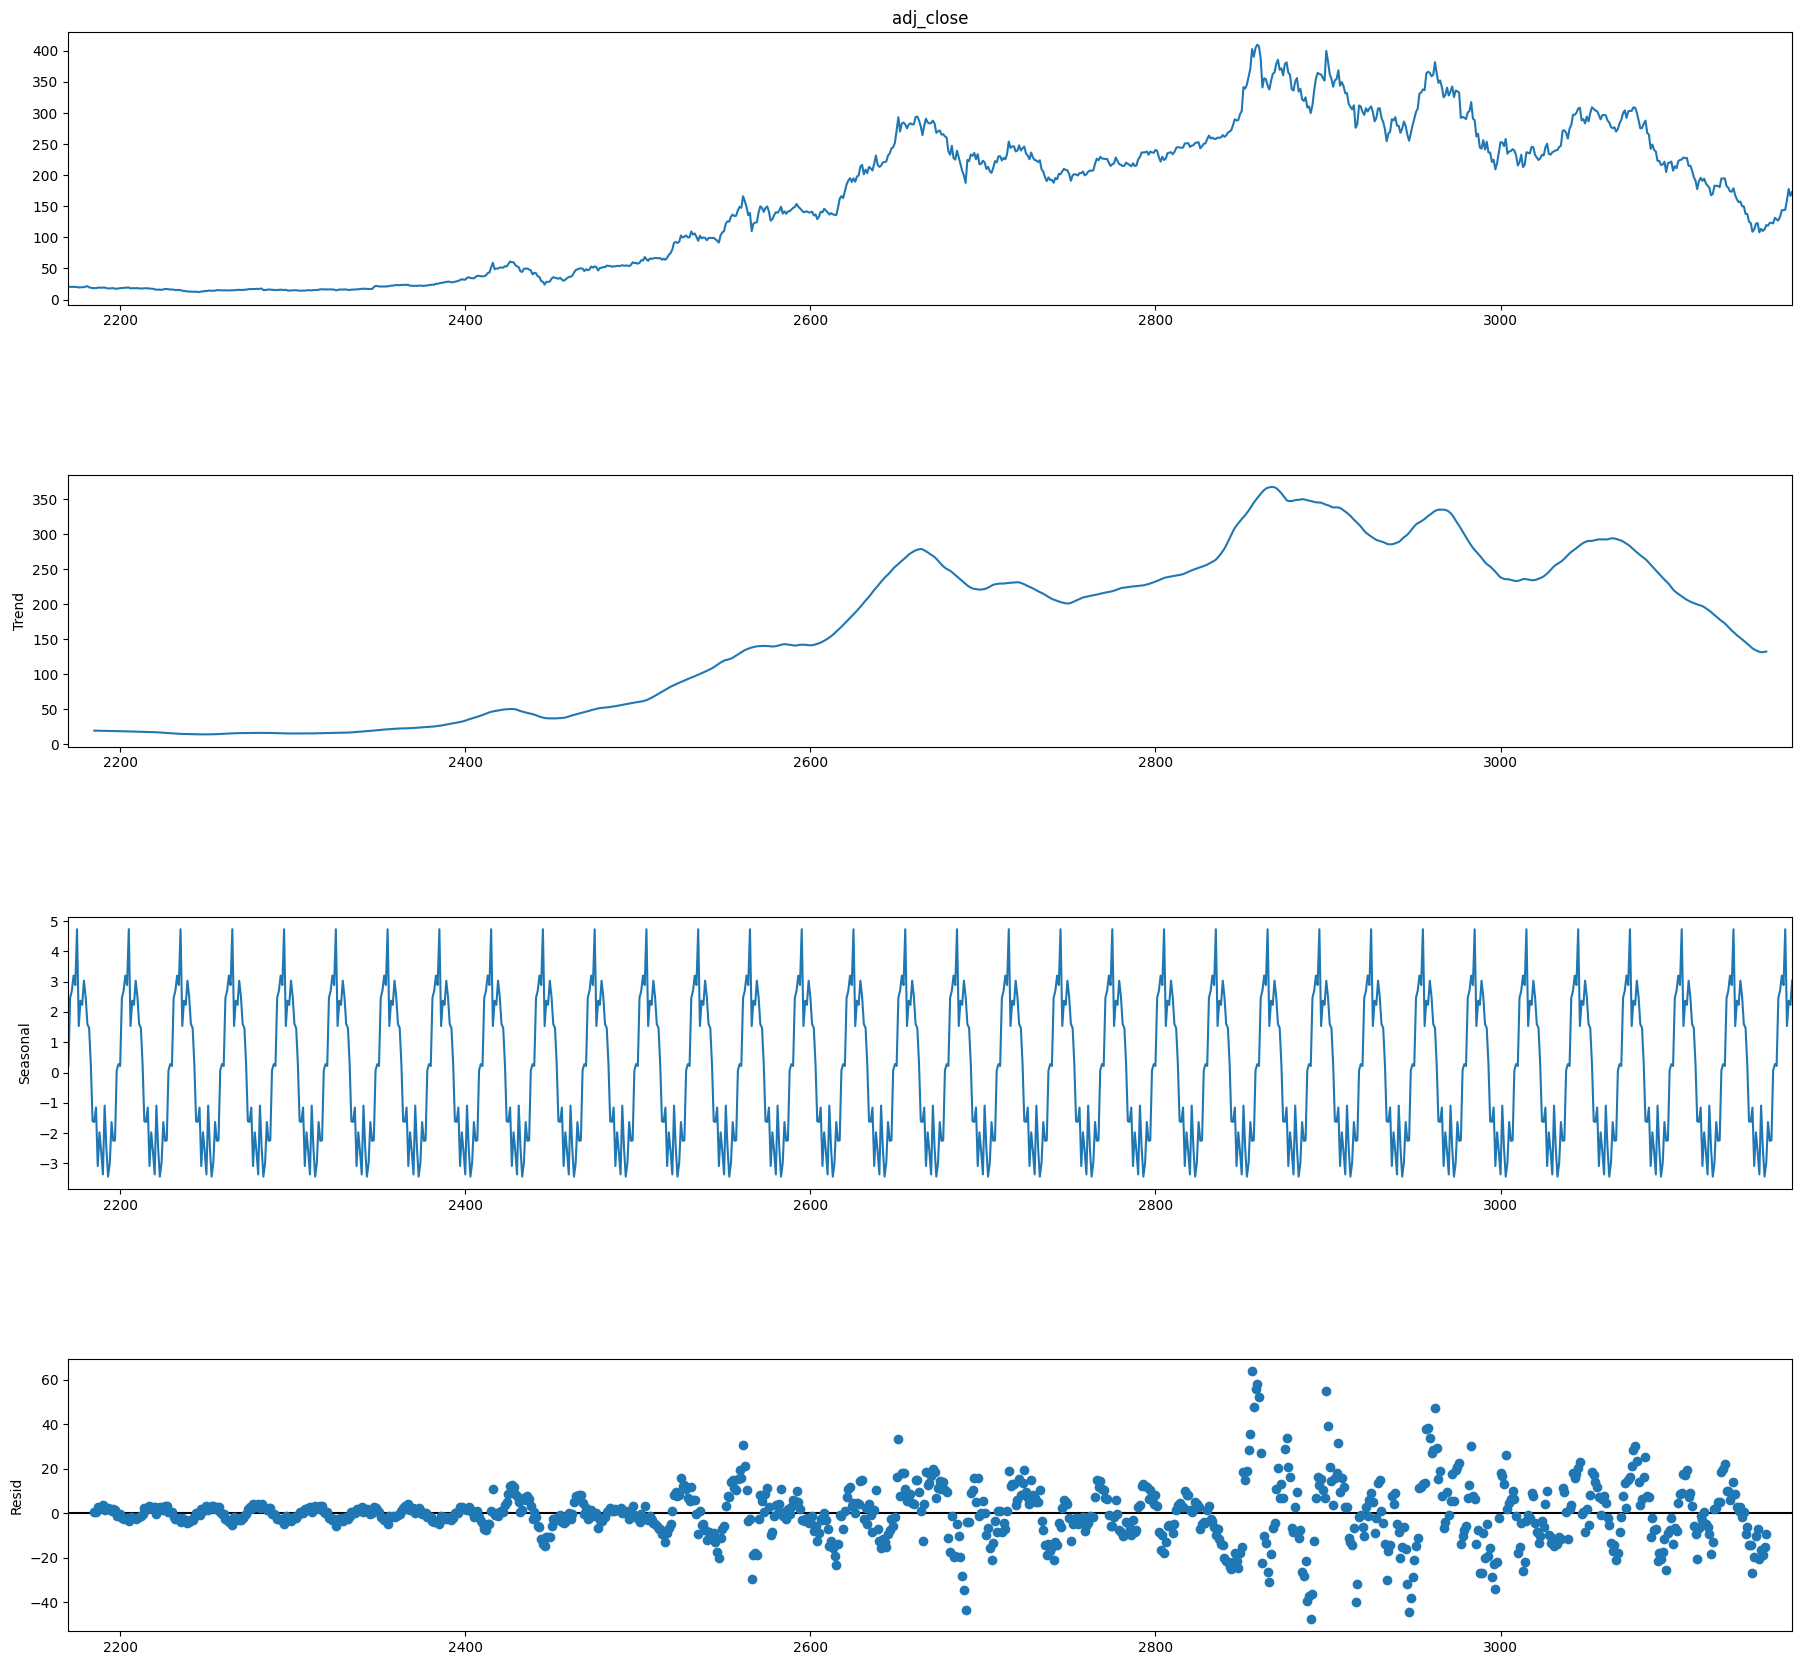

In [48]:
# Last n days visualized
n = 1000
result_data = seasonal_decompose(
    raw_tsla_df.adj_close.tail(n),
    model='additive',
    period=30
)

fig = go.Figure()
fig = result_data.plot()
fig.set_size_inches(20, 19)

#### Esports Gaming Group

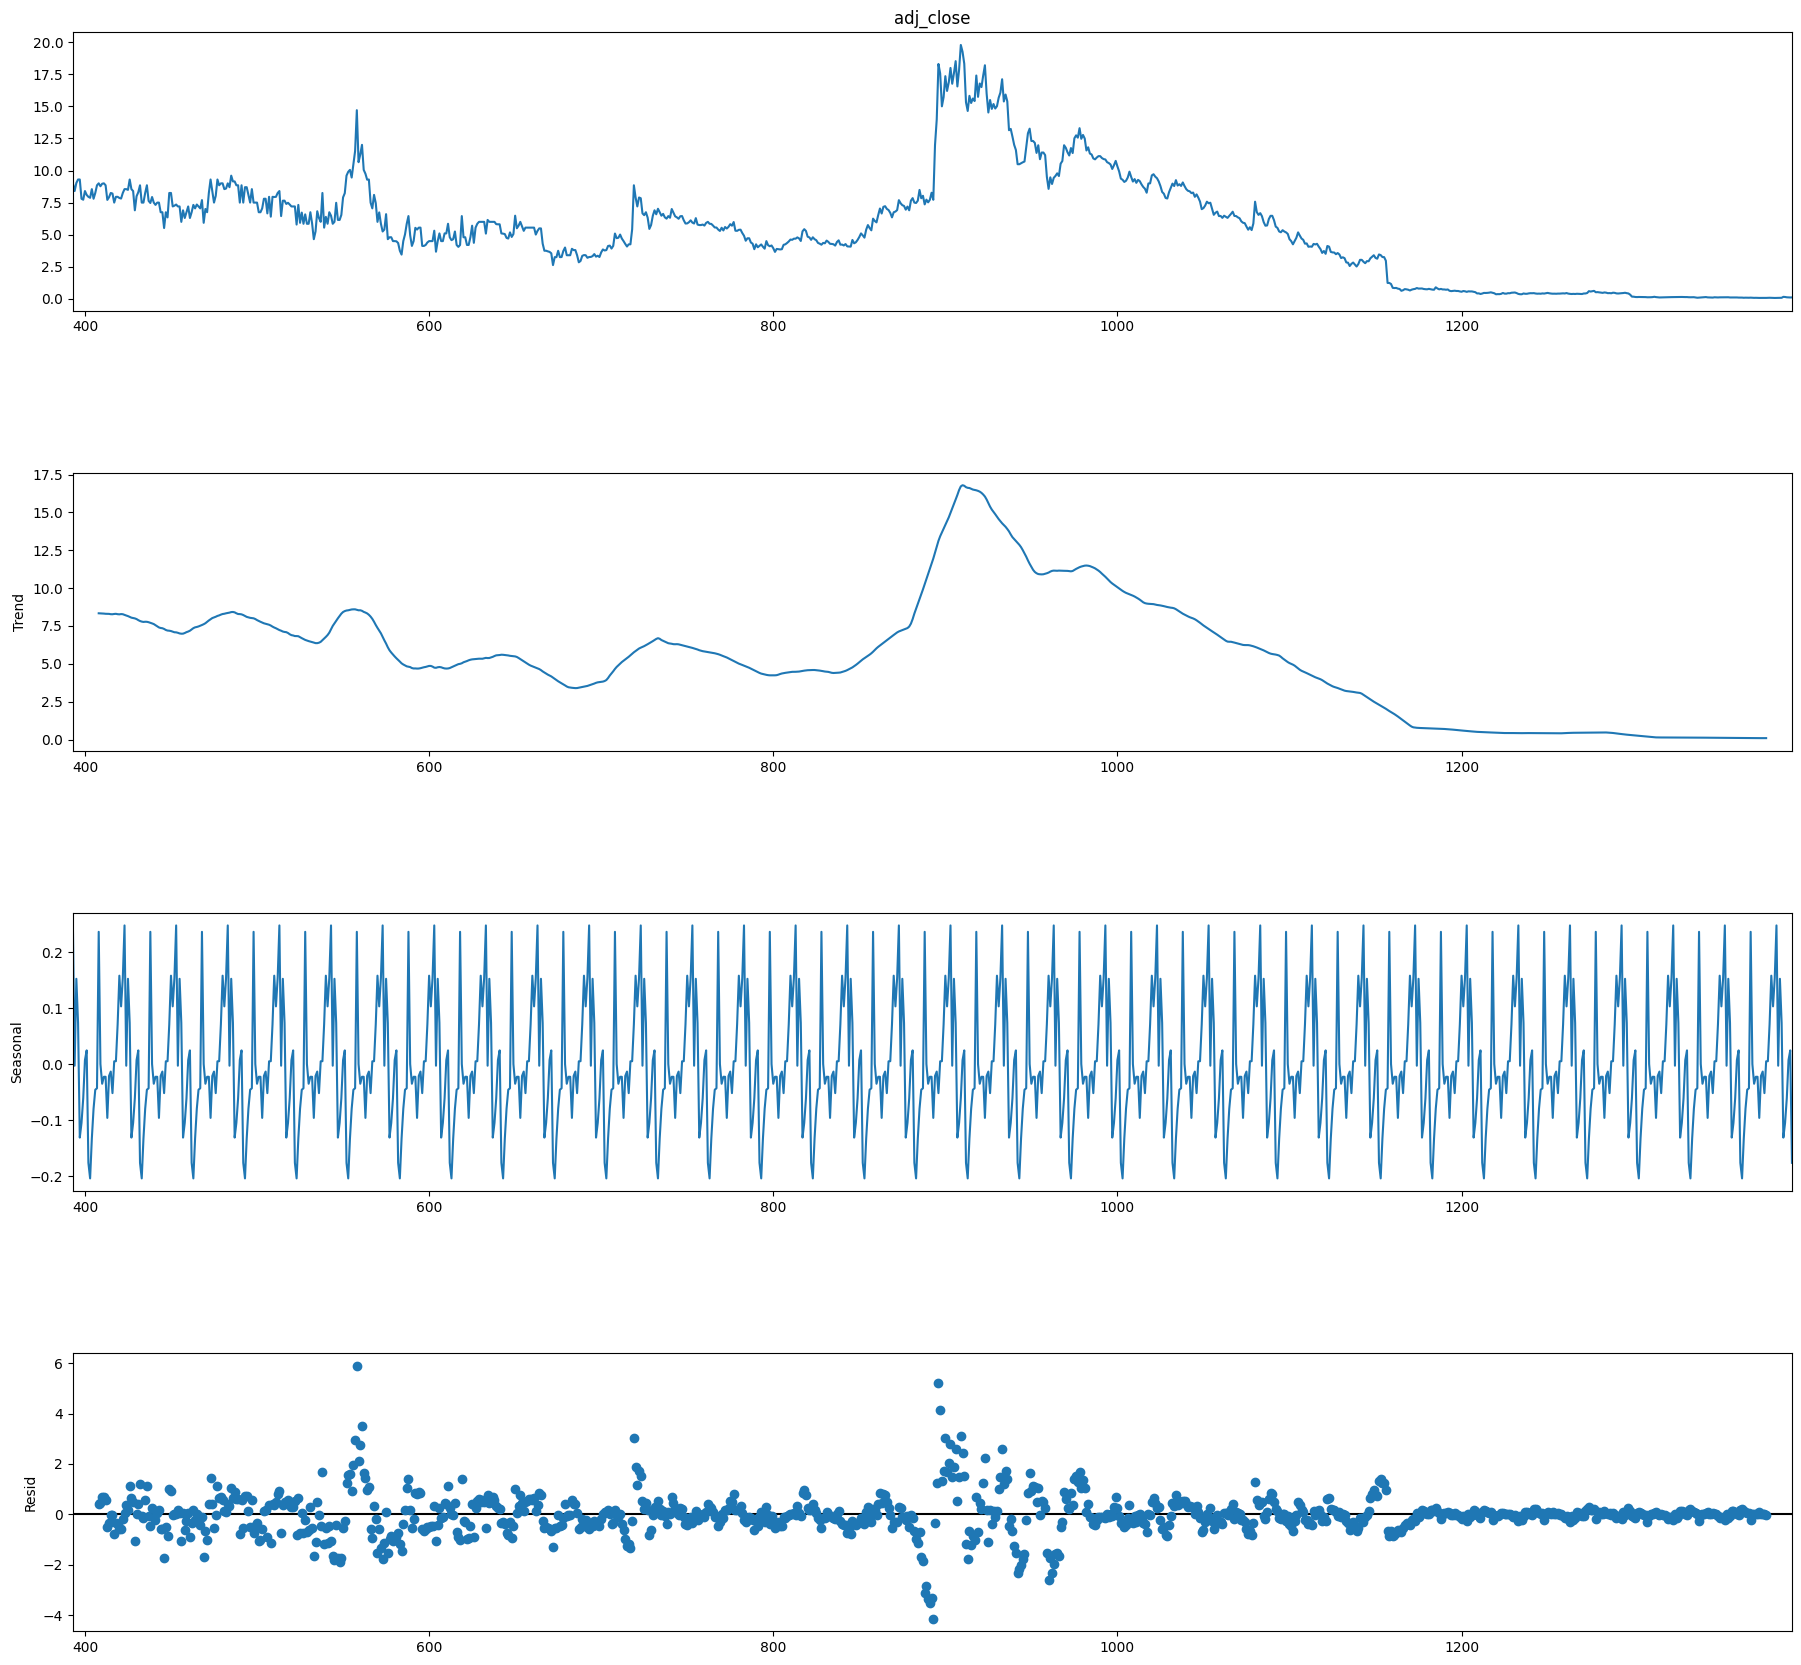

In [49]:
# Last n days visualized
n = 1000
result_data = seasonal_decompose(
    raw_gmbl_df.adj_close.tail(n),
    model='additive',
    period=30
)

fig = go.Figure()
fig = result_data.plot()
fig.set_size_inches(20, 19)